# Изучение покупательской активности

Интернет-магазин "В один клик" продаёт разные товары: для детей, для дома, мелкую бытовую тезнику, косметику и даже продукты. Отчёт магазина за прошлый период показал, что активность покупателей начала снижаться. Привлекать новых клиентов уже не так эффективно: о магазине итак знает большая часть целевой аудитории. Возможный выход - удерживать активность постоянных клиентов. Сделать это можно с помощью персонализированных предложений.  
"В один клик" - современная компания, поэтому её руководство не хочет принимать решения просто так - только на основе анализа данных и бизнес-моделирования.  
Нашему отделу цифровых технологий поручили разработать решение, которое позволит персонализировать предложения постоянным клиентам, чтобы увеличить их покупательскую активность.  

Руководитель уже сформировал подход к решению задачи:  
1. Нужно промаркировать уровень финансовой активности постоянных покупателей. В компании принято выделять два уровня активности: "снизилась", если клиент стал покупать меньше товаров, и "прежний уровень".  
2. Нужно собрать данные по клиентам по следующим группам:  
    * Признаки, которые описывают коммуникацию сотрудников компании с клиентом.  
    * Признаки, которые описывают продуктовое поведение покупателя. Например, какие товары покупает и как часто.  
    * Признаки, которые описывают покупательское поведение клиента. Например, сколько тратил в магазине.  
    * Признаки, которые описывают поведение покупателя на сайте. Например, как много страниц просматривает и сколько времени проводит на сайте.

Описание решения задачи:  
1. Нужно построить модель, которая предскажет вероятность снижения покупательской активности клиента в следующие три месяца.  
2. В исследование нужно включить дополнительные данные финансового департамента о прибыльности клиента: какой доход каждый покупатель приносил компании за последние три месяца.  
3. Используя данные модели и данные о прибыльности клиентов, нужно выделить сегменты покупателей и разработать для них персонализированные предложения.

Руководство одобрило описание решения, и нам нужно его реализовать.  
  
  **План работы**  
  
  *Первый этап. Разработка модели, которая предскажет вероятность снижения покупательской активности*
  
1) Загрузить данные. Проверить, что данные в таблицах соответствуют описанию.
2) Выполнить предобработку данных.  
3) Провести исследовательский анализ данных из каждой таблицы.  
4) Объединить таблицы.  
5) Провести корреляционный анализ признаков.  
6) Обучить несколько моделей и выбрать лучшую модель. Использовать пайплайны.  
7) Оценить важность признаков для лучшей модели. 

  *Второй этап. Сегментация покупателей*
  
8) Выполнить сегментацию покупателей по данным о прибыльности покупателей.  
9) Выбрать группу покупателей и предложить, как увеличить её покупательскую активность.  
10) Сделать выводы.

**Описание данных**  

Данные для работы находятся в нескольких таблицах:  

`market_file.csv` - таблица, которая содержит данные о поведении покупателя на сайте, о коммуникациях с покупателем и его продуктовом поведении:  
- `id` — номер покупателя в корпоративной базе данных.
- `Покупательская активность` — рассчитанный класс покупательской активности (целевой признак): «снизилась» или «прежний уровень».
- `Тип сервиса` — уровень сервиса, например «премиум» и «стандарт».
- `Разрешить сообщать` — информация о том, можно ли присылать покупателю дополнительные предложения о товаре. Согласие на это даёт покупатель.
- `Маркет_актив_6_мес` — среднемесячное значение маркетинговых коммуникаций компании, которое приходилось на покупателя за последние 6 месяцев. Это значение показывает, какое число рассылок, звонков, показов рекламы и прочего приходилось на клиента.
- `Маркет_актив_тек_мес` — количество маркетинговых коммуникаций в текущем месяце.
- `Длительность` — значение, которое показывает, сколько дней прошло с момента регистрации покупателя на сайте.
- `Акционные_покупки` — среднемесячная доля покупок по акции от общего числа покупок за последние 6 месяцев.
- `Популярная_категория` — самая популярная категория товаров у покупателя за последние 6 месяцев.
- `Средний_просмотр_категорий_за_визит` — показывает, сколько в среднем категорий покупатель просмотрел за визит в течение последнего месяца.
- `Неоплаченные_продукты_штук_квартал` — общее число неоплаченных товаров в корзине за последние 3 месяца.
- `Ошибка_сервиса` — число сбоев, которые коснулись покупателя во время посещения сайта.
- `Страниц_за_визит` — среднее количество страниц, которые просмотрел покупатель за один визит на сайт за последние 3 месяца.  

`market_money.csv` - таблица с данными о выручке, которую получает магазин с покупателя, то есть сколько покупатель всего потратил за период взаимодействия с сайтом:  
- `id` — номер покупателя в корпоративной базе данных.
- `Период` — название периода, во время которого зафиксирована выручка. Например, 'текущий_месяц' или 'предыдущий_месяц'.
- `Выручка` — сумма выручки за период.  

`market_time.csv` - таблица с данными о времени (в минутах), которое покупатель провёл на сайте в течение периода:  
- `id` — номер покупателя в корпоративной базе данных.
- `Период` — название периода, во время которого зафиксировано общее время.
- `минут` — значение времени, проведённого на сайте, в минутах.  

`money.csv` - таблица с данными о среднемесячной прибыли покупателя за последние 3 месяца: какую прибыль получает магазин от продаж каждому покупателю:  
- `id` — номер покупателя в корпоративной базе данных.
- `Прибыль` — значение прибыли.

In [1]:
#!pip install -U scikit-learn

In [2]:
import pandas as pd
import numpy as np

try:
    import matplotlib.pyplot as plt
except:
    !pip install --upgrade matplotlib==3.8.4
    import matplotlib.pyplot as plt

try:
    import seaborn as sns
except:
    !pip install --upgrade seaborn==0.13
    import seaborn as sns

from sklearn.model_selection import (
    train_test_split,
    RandomizedSearchCV)
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import (
    OneHotEncoder,
    OrdinalEncoder,
    StandardScaler,
    MinMaxScaler)
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score
from sklearn.inspection import permutation_importance
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor


try:
    import shap
except:
    !pip install shap
    import shap

try:
    import phik
except:
    !pip install phik
    import phik

from phik.report import plot_correlation_matrix

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

## Загрузка данных

In [3]:
# Напишем формулу для оптимизации кода вывода первичной информации
def information(dataset):
    display(dataset.head())
    display()
    display(dataset.info())

In [4]:
#Считаем первый csv-файл с данными, сохраним его в датафрейм `market_file`
try:
    market_file = pd.read_csv('/datasets/market_file.csv')
except:
    market_file = pd.read_csv('https://code.s3.yandex.net/datasets/market_file.csv')

#Изучим общую информацию о датафрейме `market_file`
information(market_file)

id Покупательская активность Тип сервиса Разрешить сообщать  \
0  215348                 Снизилась     премиум                 да   
1  215349                 Снизилась     премиум                 да   
2  215350                 Снизилась   стандартт                нет   
3  215351                 Снизилась   стандартт                 да   
4  215352                 Снизилась   стандартт                нет   

   Маркет_актив_6_мес  Маркет_актив_тек_мес  Длительность  Акционные_покупки  \
0                 3.4                     5           121               0.00   
1                 4.4                     4           819               0.75   
2                 4.9                     3           539               0.14   
3                 3.2                     5           896               0.99   
4                 5.1                     3          1064               0.94   

  Популярная_категория  Средний_просмотр_категорий_за_визит  \
0     Товары для детей                                    6   
1     Товары для детей                                    4   
2    Домашний текстиль                                    5   
3     Товары для детей                                    5   
4     Товары для детей                                    3   

   Неоплаченные_продукты_штук_квартал  Ошибка_сервиса  Страниц_за_визит  
0                                   2               1                 5  
1                                   4               2                 5  
2                                   2               1                 5  
3                                   0               6                 4  
4                                   2               3                 2

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   int64  
 1   Покупательская активность            1300 non-null   object 
 2   Тип сервиса                          1300 non-null   object 
 3   Разрешить сообщать                   1300 non-null   object 
 4   Маркет_актив_6_мес                   1300 non-null   float64
 5   Маркет_актив_тек_мес                 1300 non-null   int64  
 6   Длительность                         1300 non-null   int64  
 7   Акционные_покупки                    1300 non-null   float64
 8   Популярная_категория                 1300 non-null   object 
 9   Средний_просмотр_категорий_за_визит  1300 non-null   int64  
 10  Неоплаченные_продукты_штук_квартал   1300 non-null   int64  
 11  Ошибка_сервиса                

None

In [5]:
#Считаем второй csv-файл с данными, сохраним его в датафрейм `market_money`
try:
    market_money = pd.read_csv('/datasets/market_money.csv')
except:
    market_money = pd.read_csv('https://code.s3.yandex.net/datasets/market_money.csv')

#Изучим общую информацию о датафрейме `market_money`
information(market_money)

id               Период  Выручка
0  215348  препредыдущий_месяц      0.0
1  215348        текущий_месяц   3293.1
2  215348     предыдущий_месяц      0.0
3  215349  препредыдущий_месяц   4472.0
4  215349        текущий_месяц   4971.6

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       3900 non-null   int64  
 1   Период   3900 non-null   object 
 2   Выручка  3900 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 91.5+ KB


None

In [6]:
#Считаем третий csv-файл с данными, сохраним его в датафрейм `market_time`
try:
    market_time = pd.read_csv('/datasets/market_time.csv')
except:
    market_time = pd.read_csv('https://code.s3.yandex.net/datasets/market_time.csv')

#Изучим общую информацию о датафрейме `market_time`
information(market_time)

id            Период  минут
0  215348     текущий_месяц     14
1  215348  предыдцщий_месяц     13
2  215349     текущий_месяц     10
3  215349  предыдцщий_месяц     12
4  215350     текущий_месяц     13

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2600 non-null   int64 
 1   Период  2600 non-null   object
 2   минут   2600 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 61.1+ KB


None

In [7]:
#Считаем четвёртый csv-файл с данными, сохраним его в датафрейм `money`
try:
    money = pd.read_csv('/datasets/money.csv', sep=';', decimal=',')
except:
    money = pd.read_csv('https://code.s3.yandex.net/datasets/money.csv', sep=';', decimal=',')

#Изучим общую информацию о датафрейме `money`
information(money)

id  Прибыль
0  215348     0.98
1  215349     4.16
2  215350     3.13
3  215351     4.87
4  215352     4.21

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       1300 non-null   int64  
 1   Прибыль  1300 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 20.4 KB


None

Файл `market_file` содержит данные о поведении покупателя на сайте, о коммуникациях с покупателем и его продуктовом поведении. В таблице 1300 строк и 13 столбцов. Данные с пропусками предположительно отсутствуют. Названия столбцов нужно обработать (освободиться от пробелов). В ячейках таблицы с категориальными данными видны ошибки (стандартт), нужно проверить и исправить значения в ячейках категориальных столбцов.  
Файл `market_money` содержит данные о выручке, которую получает магазин с покупателя, то есть сколько покупатель всего потратил за период взаимодействия с сайтом. В таблице 3900 строк и 3 столбца. Пропущенных данные предположительно нет. В ячейках столбца с категориальными данными есть ошибки (препредыдущий), нужно проверить и исправить значения в ячейках категориального столбцов.  
Файл `market_time` содержит данные о времени (в минутах), которое покупатель провёл на сайте в течение периода. В таблице 2600 строк и 3 столбца. Данные с пропусками не выявлены. В ячейках категориального столбца есть ошибки (предыдцщий), нужно проверить и исправить значения в ячейках столбца.  
Файл `money` содержит данные о среднемесячной прибыли покупателя за последние 3 месяца: какую прибыль получает магазин от продаж каждому покупателю. В таблице 1300 строк и 2 столбца. Пропущенных данных не выявлено.

## Предобработка данных

In [8]:
# Создаём словарь датафреймов `dfs`
dfs = {
    'market_file': market_file,
    'market_money': market_money,
    'market_time': market_time,
    'money': money
}

# Создаём цикл для проверки на наличие пропусков, явных и неявных дубликатов в датафреймах из словаря `dfs`
for name, df in dfs.items():
    df.columns = df.columns.str.replace(' ', '_').str.lower()
    print(f'Название датафрейма: {name}\n')
    print(f'Количество пропусков\n{df.isna().sum()}\n')
    print(f'Количество дубликатов {df.duplicated().sum()}\n')
    print('Уникальные значения в категориальных столбцах:')
    df_cat = df.select_dtypes(include=['object'])
    for column in df_cat.columns:
        print(f'столбец "{column}": {df_cat[column].unique()}')
    print('-' * 40)

Название датафрейма: market_file

Количество пропусков
id                                     0
покупательская_активность              0
тип_сервиса                            0
разрешить_сообщать                     0
маркет_актив_6_мес                     0
маркет_актив_тек_мес                   0
длительность                           0
акционные_покупки                      0
популярная_категория                   0
средний_просмотр_категорий_за_визит    0
неоплаченные_продукты_штук_квартал     0
ошибка_сервиса                         0
страниц_за_визит                       0
dtype: int64

Количество дубликатов 0

Уникальные значения в категориальных столбцах:
столбец "покупательская_активность": ['Снизилась' 'Прежний уровень']
столбец "тип_сервиса": ['премиум' 'стандартт' 'стандарт']
столбец "разрешить_сообщать": ['да' 'нет']
столбец "популярная_категория": ['Товары для детей' 'Домашний текстиль' 'Косметика и аксесуары'
 'Техника для красоты и здоровья' 'Кухонная посуда'
 'Мелкая

In [9]:
# Обработаем неявные дубликаты и опечатки
market_file['тип_сервиса'] = market_file['тип_сервиса'].replace('стандартт', 'стандарт')
market_money['период'] = market_money['период'].replace('препредыдущий_месяц', 'позапрошлый_месяц')
market_time['период'] = market_time['период'].replace('предыдцщий_месяц', 'предыдущий_месяц')

# Проверим
print(f"Уникальные значения в столбце 'тип_сервиса' таблицы 'market_file': {market_file['тип_сервиса'].unique()}" )
print(f"Уникальные значения в столбце 'период' таблицы 'market_money': {market_money['период'].unique()}" )
print(f"Уникальные значения в столбце 'период' таблицы 'market_time': {market_time['период'].unique()}" )

Уникальные значения в столбце 'тип_сервиса' таблицы 'market_file': ['премиум' 'стандарт']
Уникальные значения в столбце 'период' таблицы 'market_money': ['позапрошлый_месяц' 'текущий_месяц' 'предыдущий_месяц']
Уникальные значения в столбце 'период' таблицы 'market_time': ['текущий_месяц' 'предыдущий_месяц']


Названия столбцов во всех датафреймах приведены к единому виду. Пропусков и явных дубликатов в данных нет. Неявные дубликаты (значения с ошибками в категориальных столбцах) обработаны.

## Исследовательский анализ данных
### Характеристики коммуникации
Признаки, которые описывают коммуникацию сотрудников компании с клиентом: `тип сервиса`, `разрешить сообщать`, `маркет актив 6 мес`, `маркет актив тек мес`, `длительность`.

In [10]:
# Напишем функцию построения столбчатых диаграмм
# для категориальных признаков в разбивке по таргету

# функция принимает на вход датасет, признак, заголовок графика, название оси у
def graphic_cat(data, characteristic, graphic_name, label_name):
    # строим график
    fig = plt.figure(figsize=(6, 4))
    sns.countplot(data=market_file, y=characteristic, hue='покупательская_активность')
    plt.title(graphic_name, fontsize=16)
    plt.xlabel('Количество')
    plt.ylabel(label_name)
    plt.grid()
    plt.show()
    # считаем соотношение общей численности групп клиентов по заданному признаку
    print('Соотношение общей численности групп клиентов по признаку', label_name)
    print(round(data
                .groupby(characteristic)['id']
                .count()
                .max() / data
                .groupby(characteristic)['id']
                .count()
                .min(), 2)) 

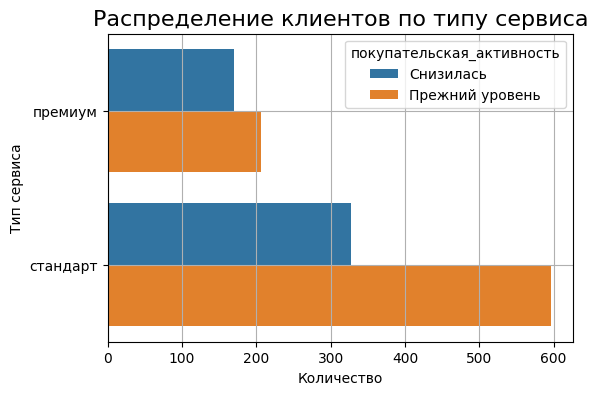

Соотношение общей численности групп клиентов по признаку Тип сервиса
2.46


In [11]:
# Построим столбчатую диаграмму распределения клиентов по типу сервиса
graphic_cat(market_file,
           'тип_сервиса',
           'Распределение клиентов по типу сервиса',
           'Тип сервиса')

Клиентов с типом сервиса `стандарт` в 2.46 раза больше, чем клиентов с типом сервиса `премиум`, причём среди клиентов, имеющих тип сервиса `стандарт`, почти в два раза больше тех, чья покупательская активность остаётся на прежнем уровне, чем тех, у кого она снизилась, а у пользующихся типом сервиса `премиум` разница невелика.  

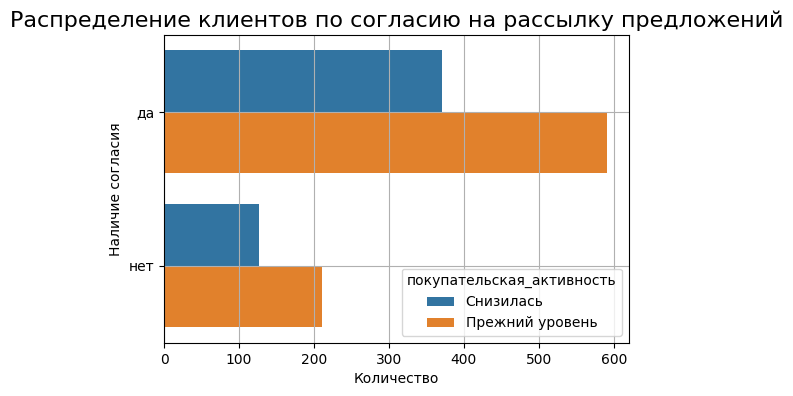

Соотношение общей численности групп клиентов по признаку Наличие согласия
2.85


In [12]:
# Построим столбчатую диаграмму распределения клиентов
# по согласию присылать покупателю предложения о товаре
graphic_cat(market_file,
           'разрешить_сообщать',
           'Распределение клиентов по согласию на рассылку предложений',
           'Наличие согласия')

Клиентов, давших согласие на рассылку предложений, в 2,85 раза больше, чем клиентов, не давших согласие. Распределение на снизивших и не снизивших покупательскую активность примерно одинаковое.

In [13]:
# Напишем функцию построения графиков для количественных признаков

# функция принимает на вход датафрейм, признак для изучения, признак для разбивки, название оси х
def graphics_num(data, characteristic, hue, feature_title):
    # задаём структуру графика
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))
    fig.suptitle(feature_title)
    # строим гистограмму
    sns.histplot(data=data, x=characteristic, hue=hue, ax=axes[0])
    axes[0].set_title('Гистограмма распределения')
    # строим график разброса
    sns.violinplot(data=data, x=characteristic, hue=hue, ax=axes[1])
    axes[1].set_title('Разброс значений признаков')
    plt.show()

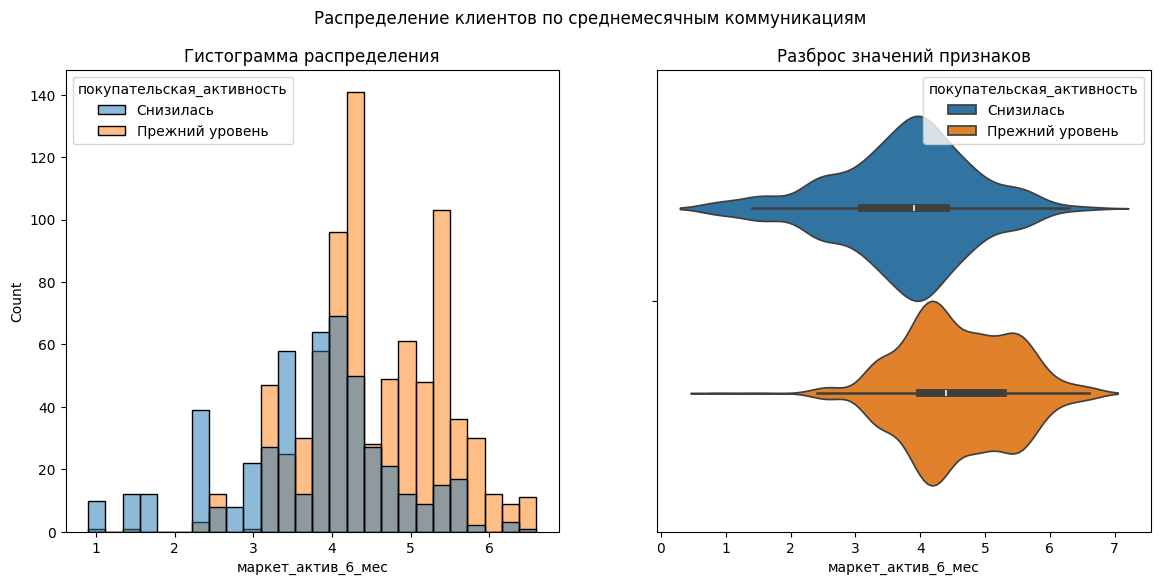

In [14]:
# Построим графики распределения клиентов по среднемесячным коммуникациям
graphics_num(market_file,
             'маркет_актив_6_мес',
             'покупательская_активность',
             'Распределение клиентов по среднемесячным коммуникациям')

Среди клиентов, имеющих больше коммуникаций в среднем за месяц, остающихся на прежнем уровне покупательской активности заметно больше.  
Медианное количество коммуникаций клиентов в среднем за месяц у снизивших покупательскую активность ниже, чем у остающихся на прежнем уровне покупательской активности.  

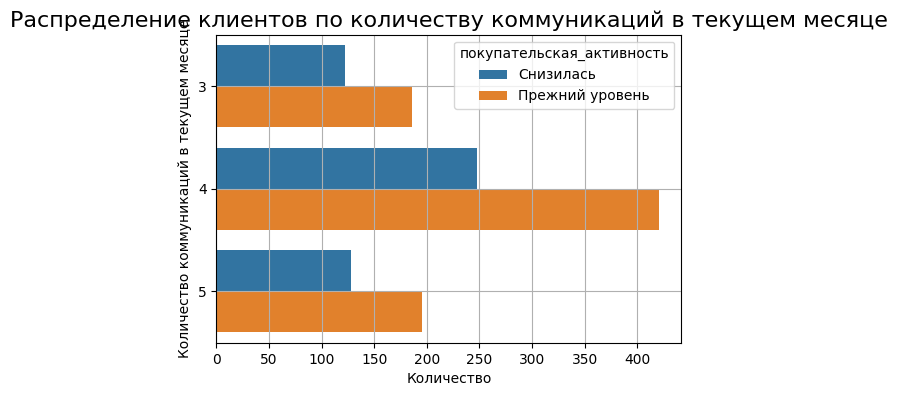

Соотношение общей численности групп клиентов по признаку Количество коммуникаций в текущем месяце
2.17


In [15]:
# Построим диаграмму распределения клиентов по числу коммуникаций в текущем месяце
graphic_cat(market_file,
           'маркет_актив_тек_мес',
           'Распределение клиентов по количеству коммуникаций в текущем месяце',
           'Количество коммуникаций в текущем месяце')

Количество коммуникаций клиентов в текущем месяце имеет три значения: 3, 4 и 5, а распределение у снизивших и не снизивших покупательскую активность примерно одинаковое.

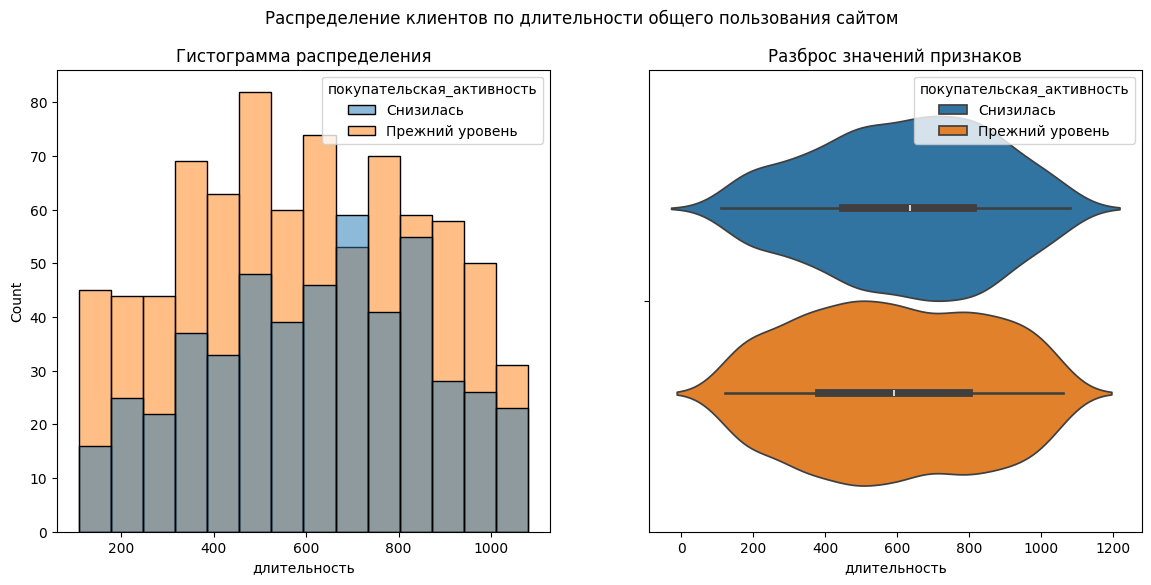

In [16]:
# Построим графики распределения клиентов по длительности общего пользования сайтом
graphics_num(market_file,
            'длительность',
            'покупательская_активность',
            'Распределение клиентов по длительности общего пользования сайтом')

Длительность пользования сайтом клиентами составляет примерно от 100 до 1100 дней, причём у клиентов, чья покупательская активность снизилась, распределение скошено вправо, а у оставшихся на прежнем уровне - скошено влево. Медианная длительность у оставшихся на прежнем уровне покупательской активности меньше, чем у снизивших активность. То есть чаще снижают покупательскую активность клиенты с большим стажем.

Итак, тип сервиса `стандарт` хорошо влияет на покупательскую активность клиентов; наличие согласия на рассылку предложений не показало зависимости с изменением покупательской активности, большее количество коммуникаций клиентов в среднем за месяц положительно влияет на сохранение покупательской активности, большой стаж снижает активность клиентов.

Категориальные признаки: `Тип сервиса`, `Разрешить сообщать`.  
Количественные признаки: `Маркет актив 6 мес`, `Маркет актив тек мес`, `Длительность`.

### Характеристики продуктового поведения клиента
Признаки, которые описывают продуктовое поведение покупателя: `Акционные покупки`, `Популярная категория`, `Средний просмотр категорий за визит`, `Неоплаченные продукты штук квартал`.

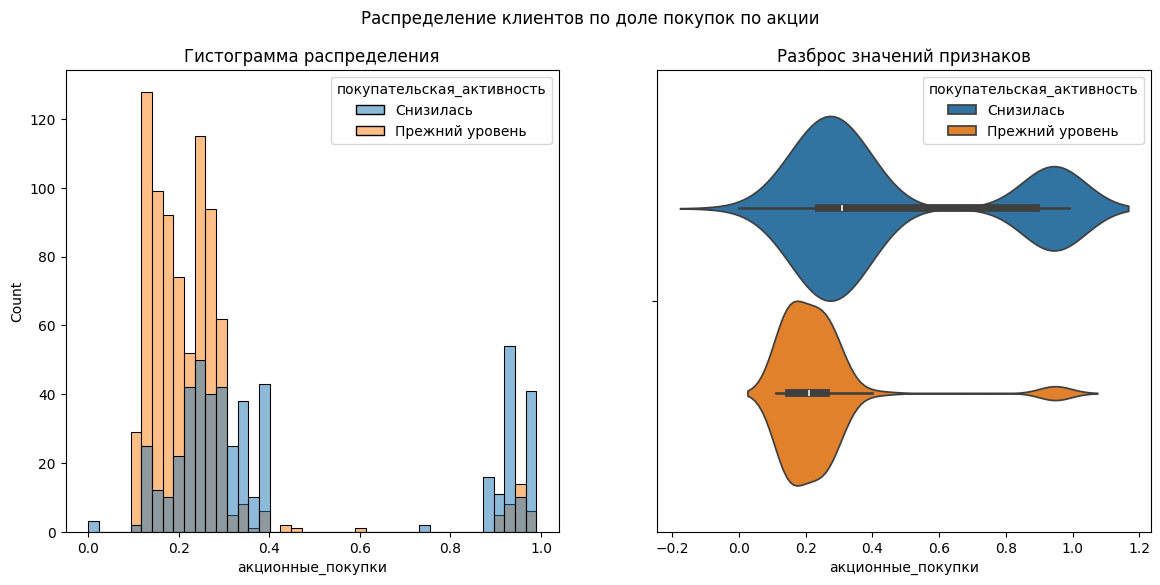

In [17]:
# Построим графики распределения клиентов по доле покупок по акции
graphics_num(market_file,
            'акционные_покупки',
            'покупательская_активность',
            'Распределение клиентов по доле покупок по акции')

Большинство клиентов делают покупки вне зависимости от того, есть акции или нет (доля покупок по акции низкая). Среди клиентов с прежним уровнем покупательской активности разброс значений небольшой, медианное значение около 20 %. Есть и такие клиенты, которые делают много покупок по акции. Этих клиентов немного, на диаграмме размаха эти данные выглядят как выбросы, но эти значения очень важны, удалять их нельзя. Другая история с клиентами, у который покупательская активность снизилась. Здесь очень большой разброс доли акционных покупок. Есть много покупателей, которые имеют небольшой процент акционных покупок, и также много таких, которые делают почти все покупки по акции (доля их близка к 100 %). Медианное значение около 30 %, но распределение на графике бимодальное.

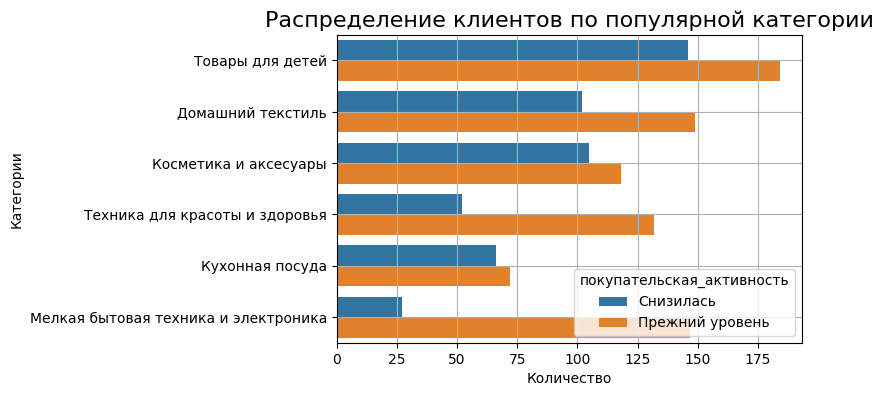

Соотношение общей численности групп клиентов по признаку Категории
2.39


In [18]:
# Построим диаграмму распределения клиентов по самой популярной категории товаров у покупателей
graphic_cat(market_file,
           'популярная_категория',
           'Распределение клиентов по популярной категории',
           'Категории')

Самой популярной у клиентов интернет-магазина является категория `Товары для детей`, достаточно популярны товары из категории `Домашний текстиль` и `Косметика и аксессуары`. В категории `Мелкая бытовая техника и электроника` покупателей со сниженной покупательской активностью очень мало. Зато в категориях `Кухонная посуда` и `Косметика и аксессуары` их почти столько же, сколько клиентов без снижения.  

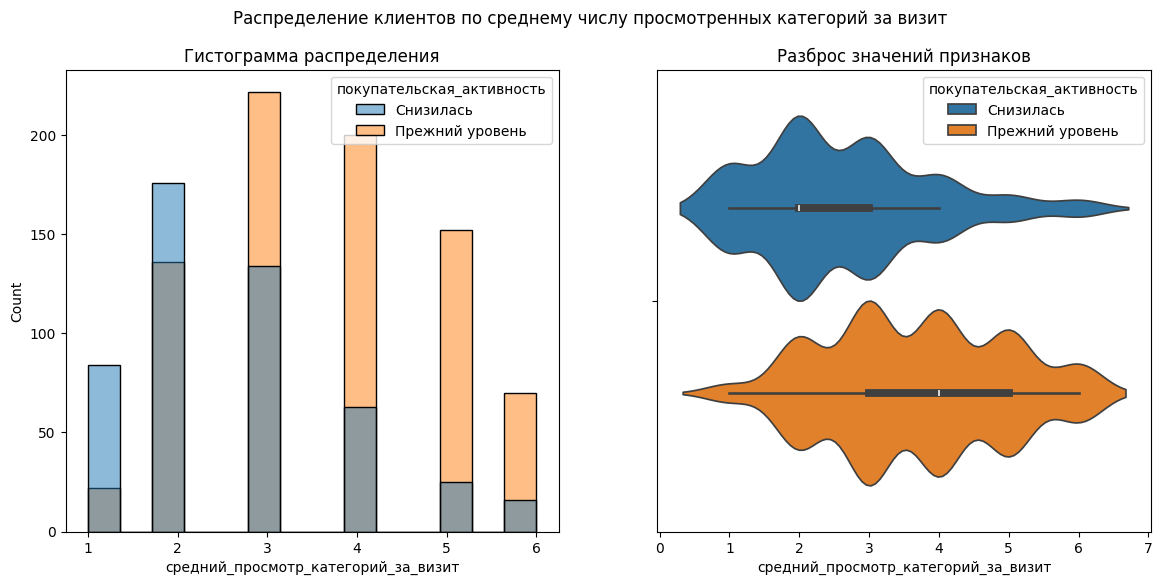

In [19]:
# Построим графики распределения клиентов по числу просмотренных категорий в среднем за визит
graphics_num(market_file,
            'средний_просмотр_категорий_за_визит',
            'покупательская_активность',
            'Распределение клиентов по среднему числу просмотренных категорий за визит')

Клиенты, которые не показали снижения покупательской активности, в среднем просматривают больше категорий (медиана 4), чем клиенты со снижением (медиана 2).

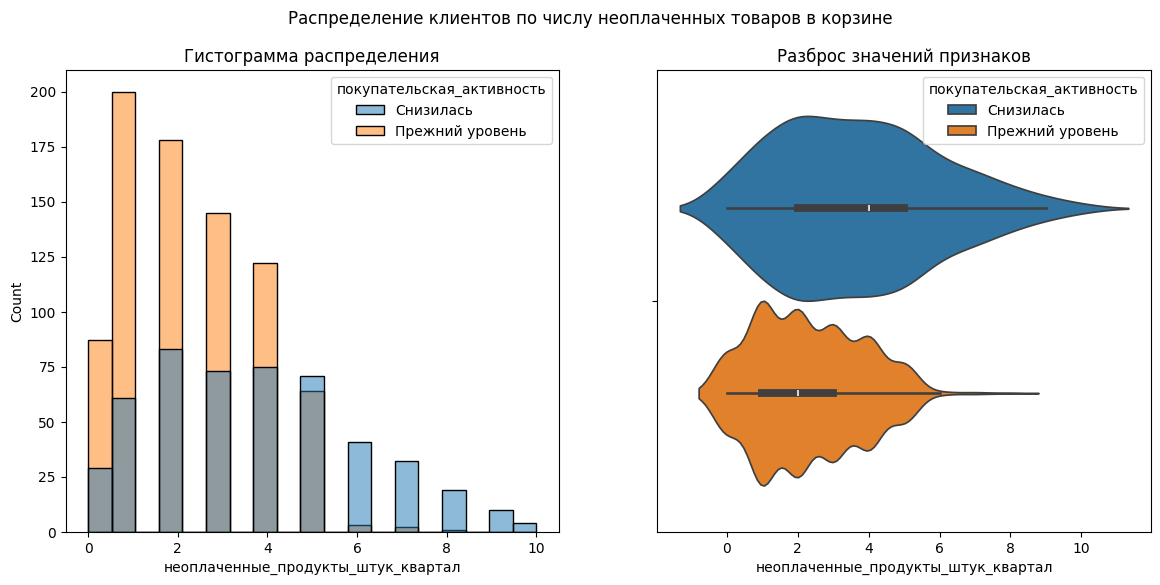

In [20]:
# Построим графики распределения числа неоплаченных товаров в корзине за последние 3 месяца
graphics_num(market_file,
            'неоплаченные_продукты_штук_квартал',
            'покупательская_активность',
            'Распределение клиентов по числу неоплаченных товаров в корзине')

Число неоплаченных товаров чаще всего небольшое, но если в категории клиентов с прежним уровнем покупательской активности их медианное число 2, то в категории со снижением покупательской активности - 4. С большим числом неоплаченных товаров почти только снизившие активность клиенты. А среди клиентов с небольшим числом неоплаченных товаров гораздо больше активных клиентов. Выбросы есть, но их не удаляем, это важные данные.

Итак, клиенты с прежним уровнем покупательской активности не обращают внимания на акции, а среди тех, кто покупает почти исключительно акционные товары большинство клиентов снижают покупательскую активность.  
У активных клиентов любимая категория `Мелкая бытовая техника и электроника`, а `Товары для детей`, `Домашний текстиль` и `Косметика и аксессуары` популярны у обех групп клиентов.  
Снижающие покупательскую активность клиенты просматривают меньше категорий и имеют больше неоплаченных товаров в корзине.

Категориальный признак: `Популярная категория`.  
Количественные признаки: `Акционные покупки`, `Средний просмотр категорий за визит`, `Неоплаченные_продукты_штук_квартал`.

### Характеристики покупательского поведения
Признаки, которые описывают покупательское поведение клиента: `Покупательская активность`, `Выручка`.

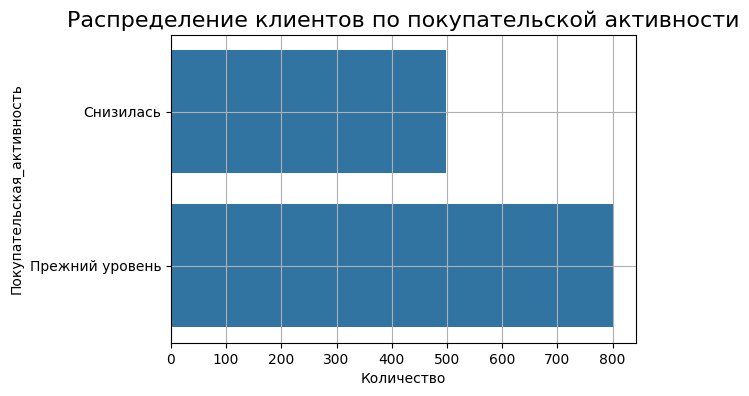

1.61


In [21]:
# Построим столбчатую диаграмму распределения клиентов по покупательской активности (целевой признак)
fig = plt.figure(figsize=(6, 4))
sns.countplot(data=market_file, y='покупательская_активность')
plt.title('Распределение клиентов по покупательской активности', fontsize=16)
plt.xlabel('Количество')
plt.ylabel('Покупательская_активность')
plt.grid()
plt.show()
print(round(market_file
            .groupby('покупательская_активность')['id']
            .count()
            .max() / market_file
            .groupby('покупательская_активность')['id']
            .count()
            .min(), 2))

Клиентов с прежним уровнем покупательской активности в 1,61 раза больше, чем клиентов со снизившимся уровнем. Имеется дисбаланс классов.

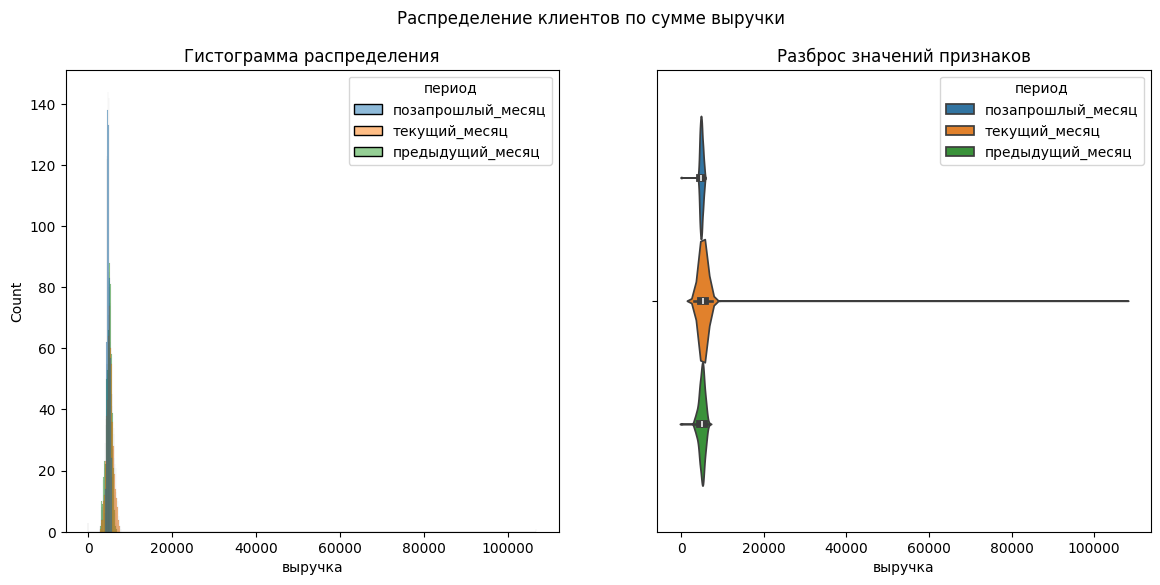

In [22]:
graphics_num(market_money,
            'выручка',
             'период', 
            'Распределение клиентов по сумме выручки')

Есть аномальные значения, выбросы хорошо видно на диаграмме размаха.

In [23]:
# Выведем на экран 5 самых больших значений столбца `выручка`
print(market_money['выручка'].sort_values(ascending=False).head())

98      106862.2
435       7799.4
262       7605.3
1481      7557.0
2388      7547.8
Name: выручка, dtype: float64


Сумма выручки почти 107 тысяч. Выведем на экран строку датафрейма с этим значением.

In [24]:
print(market_money[market_money['выручка'] > 10000])

        id         период   выручка
98  215380  текущий_месяц  106862.2


Указанная сумма выручки за текущий месяц. Попробуем посмотреть другие признаки, характеризующие этого покупателя, в датафрейме `market_file`.

In [25]:
print(market_file[market_file['id'] == 215380])

        id покупательская_активность тип_сервиса разрешить_сообщать  \
32  215380                 Снизилась     премиум                нет   

    маркет_актив_6_мес  маркет_актив_тек_мес  длительность  акционные_покупки  \
32                 1.7                     4           637               0.94   

              популярная_категория  средний_просмотр_категорий_за_визит  \
32  Техника для красоты и здоровья                                    3   

    неоплаченные_продукты_штук_квартал  ошибка_сервиса  страниц_за_визит  
32                                   2               4                 7  


Покупательская активность покупателя снизилась, и при этом сумма выручки в текущем периоде составила аномальные 107 тысяч. Явно это ошибка. Предположим, что в числе 106862.2 первые две цифры оказались случайно. Изменим это число на 6862.2.

In [26]:
# Для изменения значения 106862.2 в столбце `выручка` на значение 6862.2
# применим метод `where()`
market_money['выручка'] = market_money['выручка'].where(market_money['выручка'] < 10000, 6862.2)

# Проверим, выведя на экран 5 самых больших значений столбца `выручка`
print(market_money['выручка'].sort_values(ascending=False).head())

435     7799.4
262     7605.3
1481    7557.0
2388    7547.8
566     7467.9
Name: выручка, dtype: float64


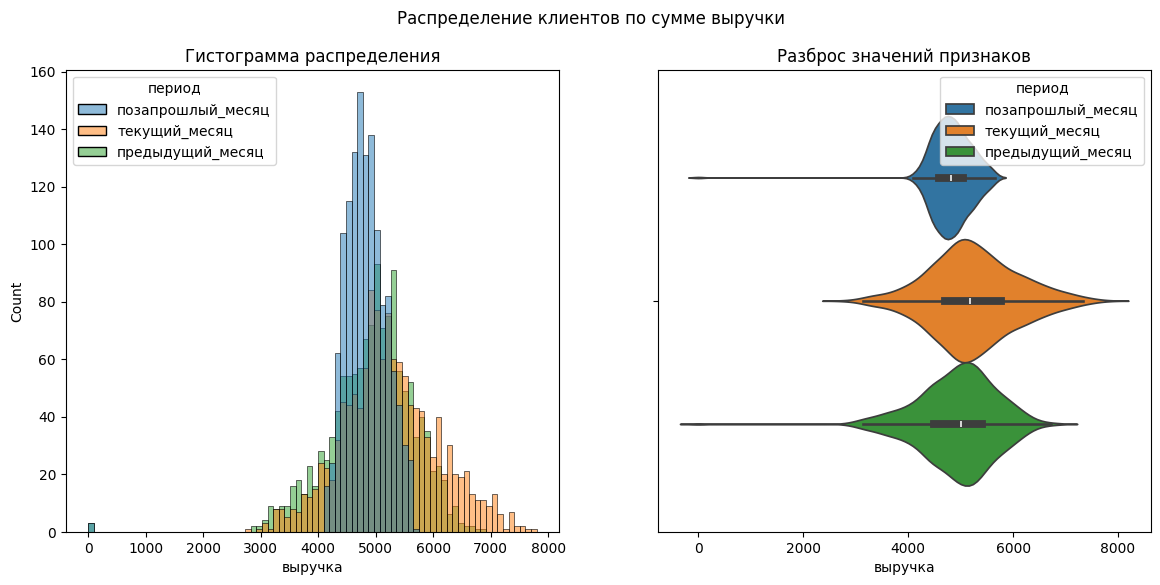

In [27]:
graphics_num(market_money,
            'выручка',
             'период', 
            'Распределение клиентов по сумме выручки')

Теперь стали видны выбросы со значениями около нуля. Проверим это.

In [28]:
# Выведем на экран 10 самых маленьких значений столбца `Выручка`
print(market_money['выручка'].sort_values().head(10))

0          0.0
2          0.0
34         0.0
35         0.0
28         0.0
29         0.0
356     2758.7
649     2890.0
662     2909.0
2485    2952.2
Name: выручка, dtype: float64


В 6 строках в рассматриваемых данных в столбце `выручка` 0.

Клиентов с прежним уровнем покупательской активности на 61 % больше, чем клиентов, у которых покупательская активность снизилась.  
Выручка клиентов в позапрошлом месяце имеет очень маленький разброс значений, в предыдущем месяце разброс был больше, в текущем - ещё больше. Сумма выручки от каждого клиента в позапрошлом периоде имела медианное значение меньше 5000, в предыдущем периоде - около 5000, в текущем периоде - больше 5000. То есть имеется некоторая тенденция роста выручки.
Аномальные значения имеются, их много, и эти значения удалять нельзя, так как размах выручки большой, он и не должен укладываться в какие-то границы.  

`Выручка` - количественный признак.

### Характеристики поведения покупателя на сайте
Признаки, которые описывают поведение покупателя на сайте: `Ошибка сервиса`, `Страниц за визит`, `минут`.

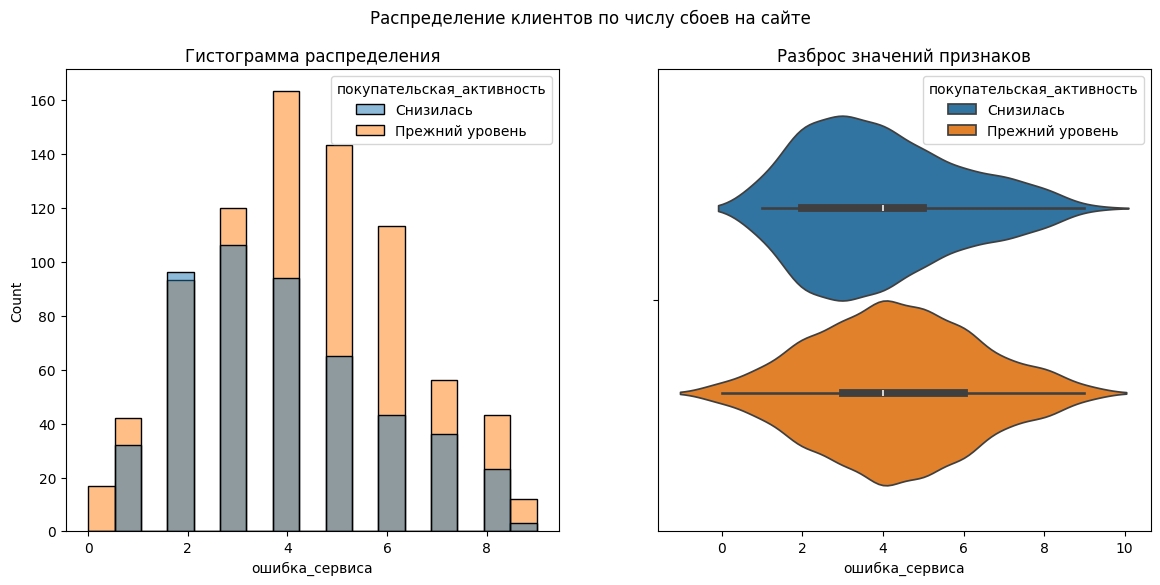

In [29]:
# Построим графики распределения числа сбоев, которые коснулись покупателя во время посещения сайта
graphics_num(market_file,
             'ошибка_сервиса',
             'покупательская_активность',
             'Распределение клиентов по числу сбоев на сайте')

Во время посещения сайта покупатель сталкивается в среднем с 4 сбоями. Аномальных значений нет. В обеих группах клиентов медианное значение числа сбоев одинаковое, но в целом среди снизивших покупательскую активность 50 % покупателей сталкивались числом сбоев от 2 до 5, а среди не снизивших - от 3 до 6 сбоев.  
По всей видимости, нет влияния числа сбоев на снижение покупательской активности, а большое число сбоев у активных покупателей является следствием большего числа операций (просмотренных категорий и т.д.).

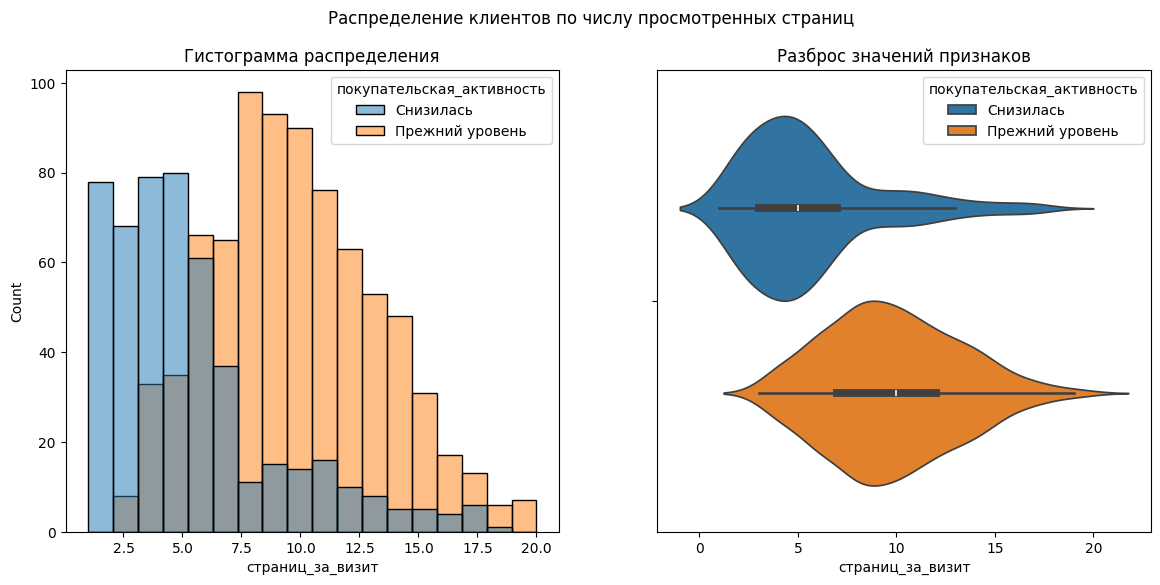

In [30]:
# Построим графики распределения покупателей по числу страниц, просмотренных покупателем за один визит
graphics_num(market_file,
             'страниц_за_визит',
             'покупательская_активность',
             'Распределение клиентов по числу просмотренных страниц')

Клиенты с прежним уровнем покупательской активности просматривают в целом больше страниц за один визит: медианное значение 10, а у снизивших покупательскую активность - 5. И в целом распределение числа просмотренных страниц у активных клиентов больше похоже на нормальное, а у снизивших покупателей - скошено влево, то есть чаще всего они просматривают мало страниц за визит.

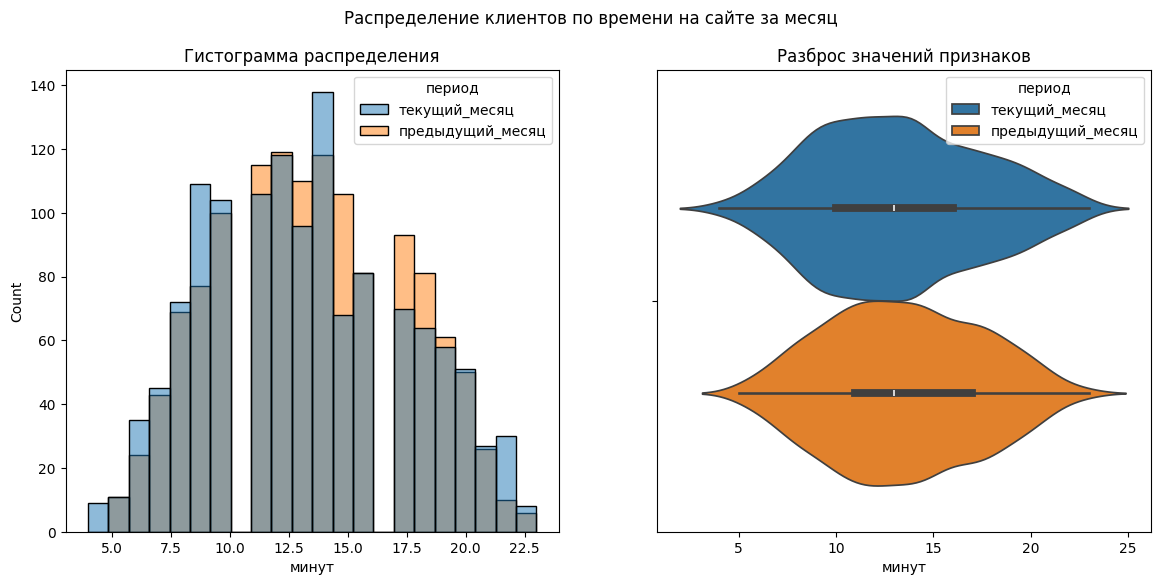

In [31]:
# Построим графики распределения покупателей по времени на сайте за месяц
graphics_num(market_time,
             'минут',
             'период',
             'Распределение клиентов по времени на сайте за месяц')

Время, проведённое клиентами на сайте за месяц, практически одинаково распределено в предыдущем и текущем месяце. 

Клиенты с прежним уровнем покупательской активности просматривают больше страниц и сталкиваются с большим числом сбоев, чем клиенты со снизившимся уровнем покупательской активности.  
Время, проведённое клиентами на сайте за месяц, в текущем месяце примерно такое же, как и в предыдущем месяце.

Количественные признаки: `ошибка сервиса`, `страниц за визит`, `минут`.

**Вывод.** Исследованы исходные данные. Они делятся на 4 группы: характеристики коммуникации сотрудников компании с клиентом, характеристики продуктового поведения клиента, характеристики покупательского поведения клиента и характеристики поведения клиента на сайте.  

У клиентов, снизивших покупательскую активность, число клиентов, имеющих тип сервиса `премиум`, больше; число давших согласие на рассылку предложений, больше; число коммуникаций в среднем за месяц ниже; длительность пользования сайтом с момента регистрации - несколько выше.

Клиенты, чья покупательская активность снизилась, большой разброс процента акционных покупок, некоторые делают почти только покупки по акциям; в категориях `Кухонная посуда` и `Косметика и аксессуары` покупателей снизивших и не снизивших активность почти поровну; снизившие покупательскую активность просматривают меньше категорий товаров за визит, неоплаченных товаров в корзине у них больше.  

Число сбоев на сайте не слишком различается у категорий клиентов с разной покупательской активностью. Число просматриваемых страницй за визит у снизивших покупательскую активность гораздо ниже, чем у оставшихся на прежнем уровне покупательской активности.

Время, проведённое на сайте клиентами, в предыдущем и текущем месяце примерно одинаковое.

## Отбор активных клиентов и объединение таблиц
Объединим таблицы `market_file`, `market_money`, `market_time`.  
Уберём из данных клиентов, которые не проявили активности хотя бы в одном из 3 месяцев. Это нужно сделать потому, что к постоянным клиентам таких клиентов отнести нельзя, по ним невозможно сделать прогноз, снизится у них покупательская активность или останется на прежнем уровне.  
Кроме того, нули в столбце `выручка` могут быть связаны с тем что клиент например уехал в отпуск, или потому что он недавно стал клиентом.  Поэтому зачем включать нули, если они не характеризуют деловую активность.

In [32]:
# Сделаем столбец `id` индексами в датафреймах `market_file`, `market_money`, `market_time`
market_file_id = market_file.set_index('id')
market_money_id = market_money.set_index('id')
market_time_id = market_time.set_index('id')

In [33]:
# Делаем отдельный столбец по выручке клиентов для каждого периода
market_money_period = market_money_id.pivot_table(index='id', columns='период', values='выручка', aggfunc='sum')
market_money_period.columns = ['выручка_позапрошлый_месяц', 'выручка_предыдущий_месяц', 'выручка_текущий_месяц']
information(market_money_period)

выручка_позапрошлый_месяц  выручка_предыдущий_месяц  \
id                                                            
215348                        0.0                       0.0   
215349                     4472.0                    5216.0   
215350                     4826.0                    5457.5   
215351                     4793.0                    6158.0   
215352                     4594.0                    5807.5   

        выручка_текущий_месяц  
id                             
215348                 3293.1  
215349                 4971.6  
215350                 5058.4  
215351                 6610.4  
215352                 5872.5

<class 'pandas.core.frame.DataFrame'>
Index: 1300 entries, 215348 to 216647
Data columns (total 3 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   выручка_позапрошлый_месяц  1300 non-null   float64
 1   выручка_предыдущий_месяц   1300 non-null   float64
 2   выручка_текущий_месяц      1300 non-null   float64
dtypes: float64(3)
memory usage: 40.6 KB


None

In [34]:
# Делаем отдельный столбец по времени на сайте клиентов для каждого периода
market_time_period = market_time_id.pivot_table(index='id', columns='период', values='минут', aggfunc='sum')
market_time_period.columns = ['минут_предыдущий_месяц', 'минут_текущий_месяц']
information(market_time_period)

минут_предыдущий_месяц  минут_текущий_месяц
id                                                 
215348                      13                   14
215349                      12                   10
215350                       8                   13
215351                      11                   13
215352                       8                   11

<class 'pandas.core.frame.DataFrame'>
Index: 1300 entries, 215348 to 216647
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   минут_предыдущий_месяц  1300 non-null   int64
 1   минут_текущий_месяц     1300 non-null   int64
dtypes: int64(2)
memory usage: 30.5 KB


None

In [35]:
# Отберём активных клиентов, убрав клиентов, которые не проявили активность хотя бы в одном из 3 месяцев
market_active = market_money_period.loc[
    (market_money_period['выручка_позапрошлый_месяц'] != 0) &\
    (market_money_period['выручка_предыдущий_месяц'] != 0) &\
    (market_money_period['выручка_текущий_месяц'] != 0)
]
information(market_active)

выручка_позапрошлый_месяц  выручка_предыдущий_месяц  \
id                                                            
215349                     4472.0                    5216.0   
215350                     4826.0                    5457.5   
215351                     4793.0                    6158.0   
215352                     4594.0                    5807.5   
215353                     5124.0                    4738.5   

        выручка_текущий_месяц  
id                             
215349                 4971.6  
215350                 5058.4  
215351                 6610.4  
215352                 5872.5  
215353                 5388.5

<class 'pandas.core.frame.DataFrame'>
Index: 1297 entries, 215349 to 216647
Data columns (total 3 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   выручка_позапрошлый_месяц  1297 non-null   float64
 1   выручка_предыдущий_месяц   1297 non-null   float64
 2   выручка_текущий_месяц      1297 non-null   float64
dtypes: float64(3)
memory usage: 40.5 KB


None

In [36]:
# Объединяем все три таблицы методом join(), не включая клиентов, которых мы удалили
market_total = market_file_id.join([market_active, market_time_period], how='inner')
information(market_total)

покупательская_активность тип_сервиса разрешить_сообщать  \
id                                                                
215349                 Снизилась     премиум                 да   
215350                 Снизилась    стандарт                нет   
215351                 Снизилась    стандарт                 да   
215352                 Снизилась    стандарт                нет   
215353                 Снизилась    стандарт                 да   

        маркет_актив_6_мес  маркет_актив_тек_мес  длительность  \
id                                                               
215349                 4.4                     4           819   
215350                 4.9                     3           539   
215351                 3.2                     5           896   
215352                 5.1                     3          1064   
215353                 3.3                     4           762   

        акционные_покупки популярная_категория  \
id                                               
215349               0.75     Товары для детей   
215350               0.14    Домашний текстиль   
215351               0.99     Товары для детей   
215352               0.94     Товары для детей   
215353               0.26    Домашний текстиль   

        средний_просмотр_категорий_за_визит  \
id                                            
215349                                    4   
215350                                    5   
215351                                    5   
215352                                    3   
215353                                    4   

        неоплаченные_продукты_штук_квартал  ошибка_сервиса  страниц_за_визит  \
id                                                                             
215349                                   4               2                 5   
215350                                   2               1                 5   
215351                                   0               6                 4   
215352                                   2               3                 2   
215353                                   1               1                 4   

        выручка_позапрошлый_месяц  выручка_предыдущий_месяц  \
id                                                            
215349                     4472.0                    5216.0   
215350                     4826.0                    5457.5   
215351                     4793.0                    6158.0   
215352                     4594.0                    5807.5   
215353                     5124.0                    4738.5   

        выручка_текущий_месяц  минут_предыдущий_месяц  минут_текущий_месяц  
id                                                                          
215349                 4971.6                      12                   10  
215350                 5058.4                       8                   13  
215351                 6610.4                      11                   13  
215352                 5872.5                       8                   11  
215353                 5388.5                      10                   10

<class 'pandas.core.frame.DataFrame'>
Index: 1297 entries, 215349 to 216647
Data columns (total 17 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   покупательская_активность            1297 non-null   object 
 1   тип_сервиса                          1297 non-null   object 
 2   разрешить_сообщать                   1297 non-null   object 
 3   маркет_актив_6_мес                   1297 non-null   float64
 4   маркет_актив_тек_мес                 1297 non-null   int64  
 5   длительность                         1297 non-null   int64  
 6   акционные_покупки                    1297 non-null   float64
 7   популярная_категория                 1297 non-null   object 
 8   средний_просмотр_категорий_за_визит  1297 non-null   int64  
 9   неоплаченные_продукты_штук_квартал   1297 non-null   int64  
 10  ошибка_сервиса                       1297 non-null   int64  
 11  страниц_за_визит            

None

**Вывод.** Объединили три датафрейма в один, индексами являются `id`, данные о выручке за месяц и о времени на сайте за месяц выделены по каждому периоду в отдельные столбцы. Клиенты, которые не проявили активности хотя бы в одном из 3 месяцев, удалены из данных, подготовленных для работы.  

## Корреляционный анализ
### Диаграммы рассеяния
Проведём корреляционный анализ признаков в количественной шкале в таблице `market_total`.

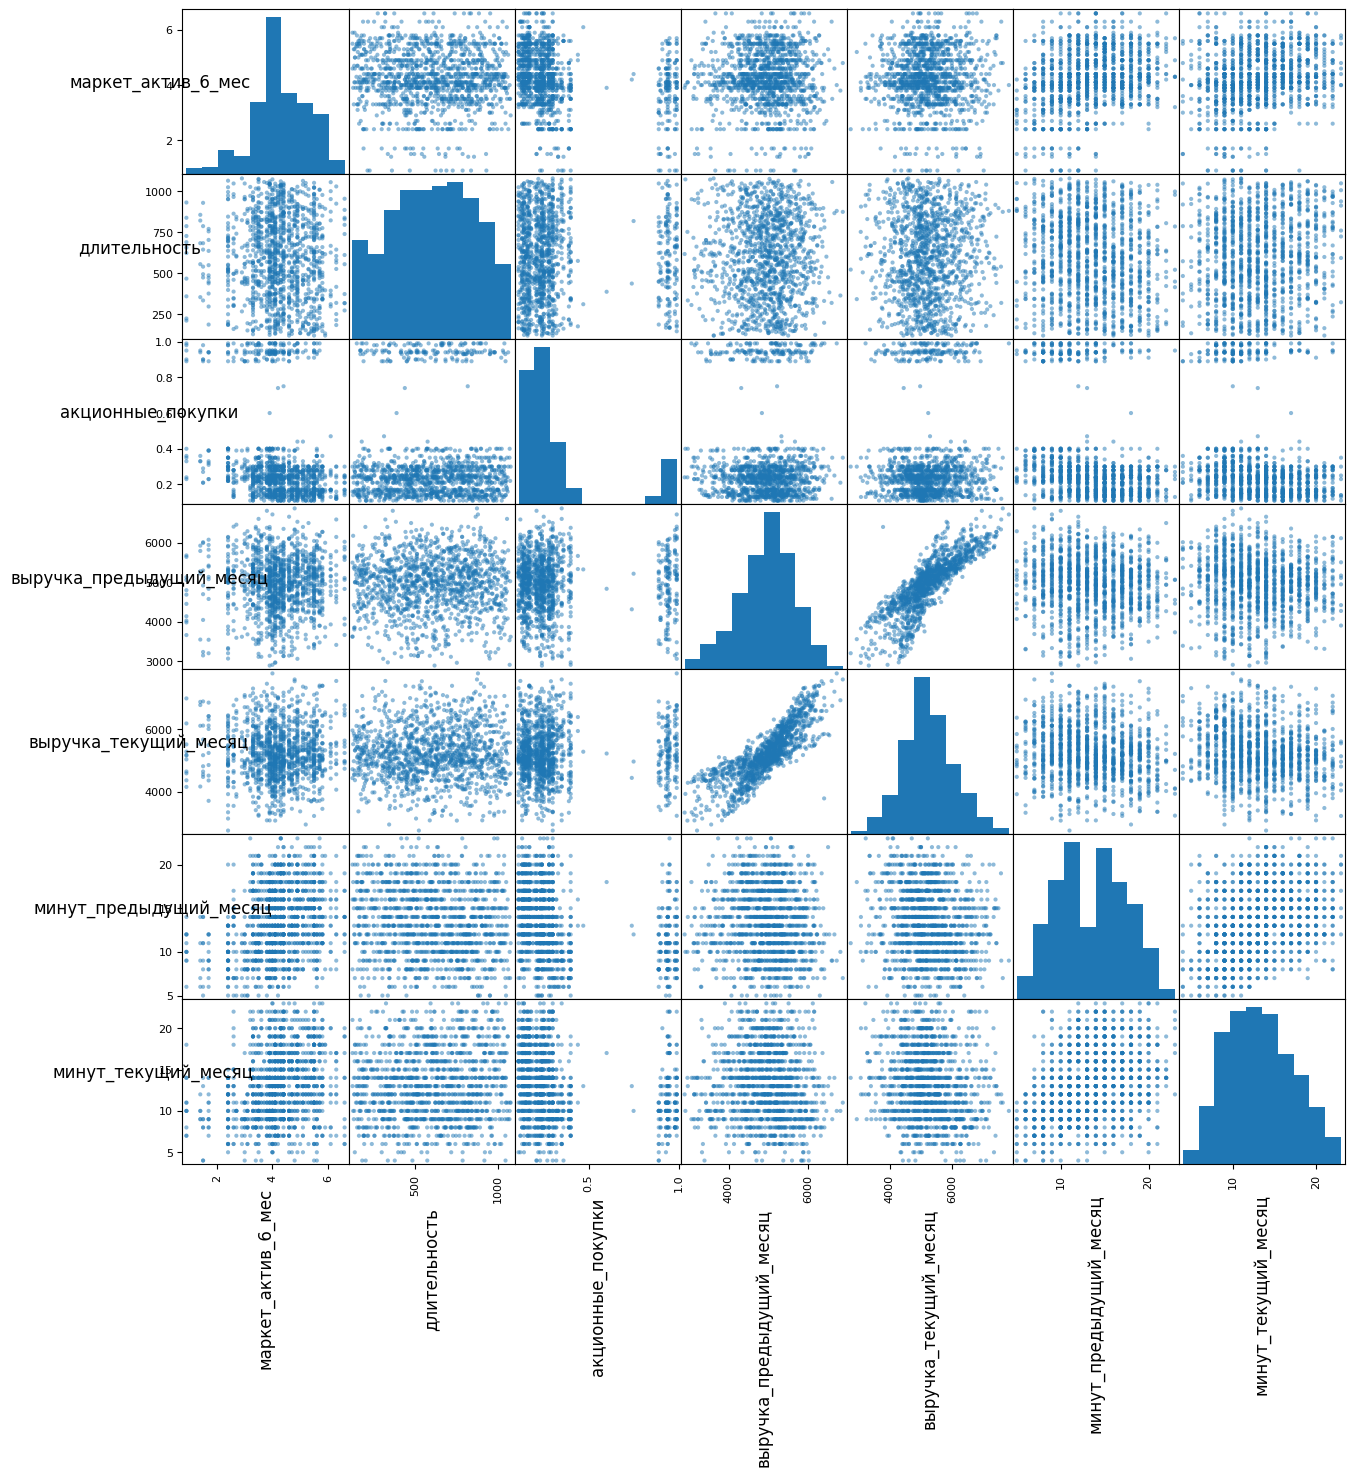

In [37]:
# Построим матрицу рассеяния
features = [
    'маркет_актив_6_мес',
    'длительность',
    'акционные_покупки',
    'выручка_предыдущий_месяц',
    'выручка_текущий_месяц',
    'минут_предыдущий_месяц',
    'минут_текущий_месяц'
]
scatter_matrix = pd.plotting.scatter_matrix(
    market_total[features],
    figsize=(15, 15)
)
for ax in scatter_matrix.ravel():
    ax.set_xlabel(ax.get_xlabel(), fontsize = 12, rotation = 90)
    ax.set_ylabel(ax.get_ylabel(), fontsize = 12, rotation = 0)
plt.show()

Линейной или какой-либо другой выраженной зависимости не наблюдается, кроме связи признаков `Выручка предыдущий месяц` и `Выручка текущий месяц`. Кроме того, по признаку `Акционные покупки` диаграмма показывает разделение на два кластера.

Рассмотрим более внимательно зависимость между признаками `Выручка предыдущий месяц` и `Выручка текущий месяц`. Зависимость выглядит как линейная, причём множество точек на одной диаграмме как будто тяготеет к двум прямым. Попробуем найти факторы, которые описывают эти два множества точек. Построим диаграммы рассеяния с учетом разных категориальных признаков.

In [38]:
def graphic_scatter(data, x, y, hue, title):
    sns.scatterplot(
        data=data,
        x=x,
        y=y,
        hue=hue,
        alpha=0.5)
    plt.title(title)
    plt.show()

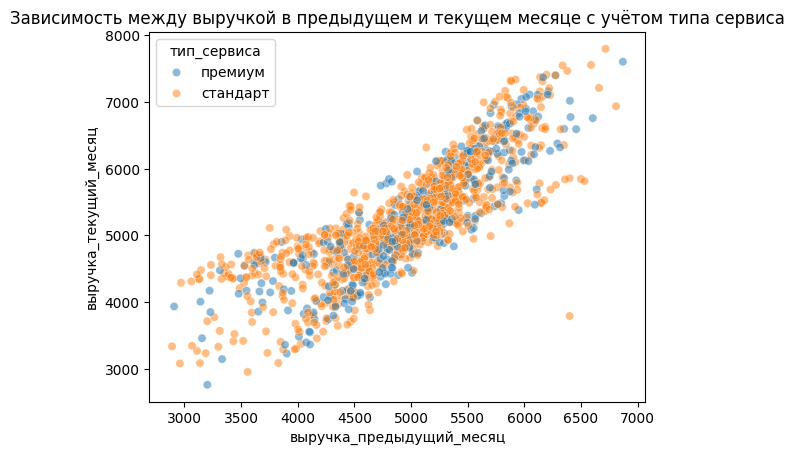

In [39]:
# Построим диаграмму рассеяния между выручкой за предыдущий и за прошлый месяц с учётом типа сервиса
graphic_scatter(
    market_total,
    'выручка_предыдущий_месяц',
    'выручка_текущий_месяц',
    'тип_сервиса',
    'Зависимость между выручкой в предыдущем и текущем месяце с учётом типа сервиса'
)

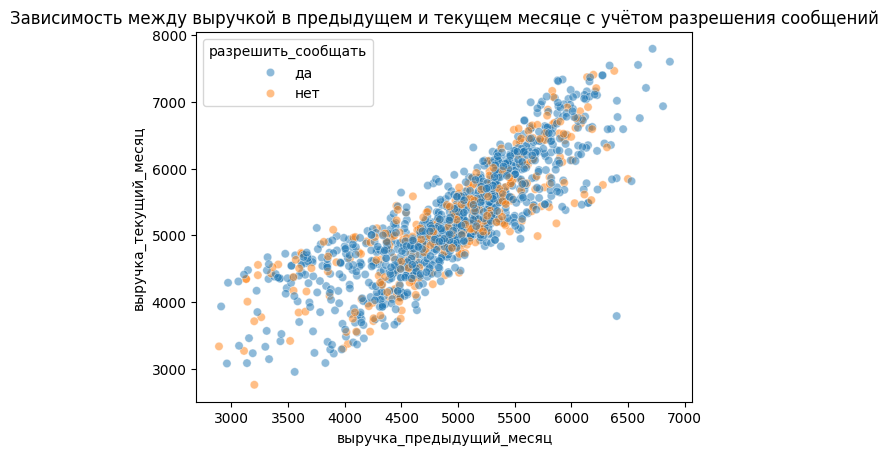

In [40]:
# Построим диаграмму рассеяния между выручкой за предыдущий и за прошлый месяц с учётом разрешений на сообщения
graphic_scatter(
    market_total,
    'выручка_предыдущий_месяц',
    'выручка_текущий_месяц',
    'разрешить_сообщать',
    'Зависимость между выручкой в предыдущем и текущем месяце с учётом разрешения сообщений'
)

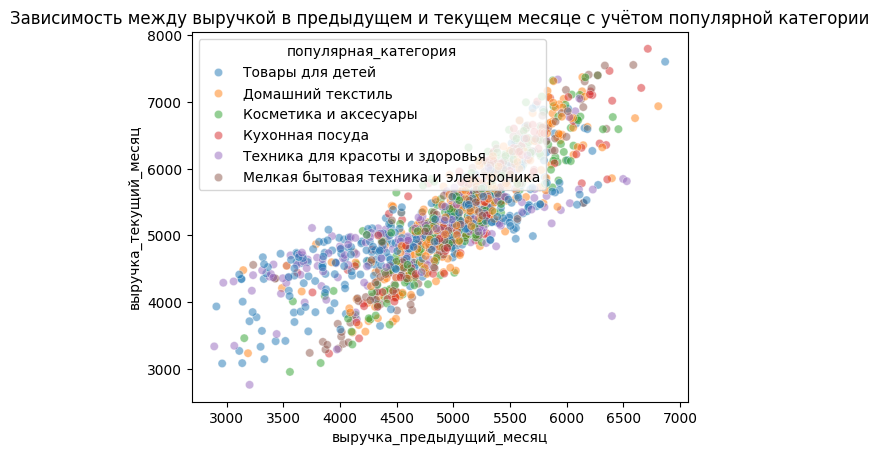

In [41]:
# Построим диаграмму рассеяния между выручкой за предыдущий и за прошлый месяц с учётом популярных категорий
graphic_scatter(
    market_total,
    'выручка_предыдущий_месяц',
    'выручка_текущий_месяц',
    'популярная_категория',
    'Зависимость между выручкой в предыдущем и текущем месяце с учётом популярной категории'
)

На графике видно, что к отдельной прямой тяготеют покупатели с популярной категорий `Товары для детей`.

In [42]:
# Создадим копию датафрейма market_total
market_total_copy = market_total.copy()
# Добавим столбец с суммой выручки за позапрошлый месяц и предыдущий месяц
market_total_copy['сумма_выручки'] = market_total_copy['выручка_предыдущий_месяц'] + market_total_copy[
    'выручка_позапрошлый_месяц']

In [43]:
market_total_copy.tail()

покупательская_активность тип_сервиса разрешить_сообщать  \
id                                                                
216643           Прежний уровень    стандарт                 да   
216644           Прежний уровень    стандарт                нет   
216645           Прежний уровень    стандарт                 да   
216646           Прежний уровень    стандарт                 да   
216647           Прежний уровень     премиум                 да   

        маркет_актив_6_мес  маркет_актив_тек_мес  длительность  \
id                                                               
216643                 6.6                     3           318   
216644                 5.1                     4           454   
216645                 4.1                     3           586   
216646                 6.3                     5           645   
216647                 4.0                     5           906   

        акционные_покупки            популярная_категория  \
id                                                          
216643               0.24  Техника для красоты и здоровья   
216644               0.21               Домашний текстиль   
216645               0.20               Домашний текстиль   
216646               0.12  Техника для красоты и здоровья   
216647               0.94  Техника для красоты и здоровья   

        средний_просмотр_категорий_за_визит  \
id                                            
216643                                    5   
216644                                    6   
216645                                    3   
216646                                    3   
216647                                    4   

        неоплаченные_продукты_штук_квартал  ошибка_сервиса  страниц_за_визит  \
id                                                                             
216643                                   3               3                11   
216644                                   2               3                 9   
216645                                   2               5                 7   
216646                                   3               5                 7   
216647                                   5               3                12   

        выручка_позапрошлый_месяц  выручка_предыдущий_месяц  \
id                                                            
216643                     4704.0                    3664.0   
216644                     5299.0                    4729.0   
216645                     5334.0                    5160.0   
216646                     4725.0                    4923.0   
216647                     5183.0                    4720.0   

        выручка_текущий_месяц  минут_предыдущий_месяц  минут_текущий_месяц  \
id                                                                           
216643                 4741.7                      14                    7   
216644                 5353.0                      12                   11   
216645                 5139.2                      12                   18   
216646                 5224.6                      18                    7   
216647                 4448.3                      15                   10   

        сумма_выручки  
id                     
216643         8368.0  
216644        10028.0  
216645        10494.0  
216646         9648.0  
216647         9903.0

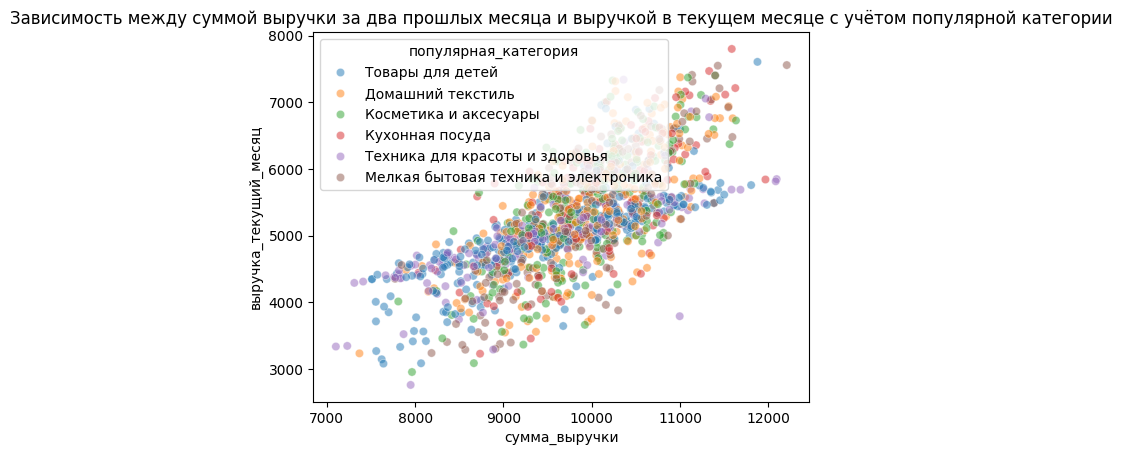

In [44]:
# Построим диаграмму рассеяния между суммой выручки за прошлый и позапрошлый месяцы и выручкой в текущем месяце
graphic_scatter(
    market_total_copy,
    'сумма_выручки',
    'выручка_текущий_месяц',
    'популярная_категория',
    'Зависимость между суммой выручки за два прошлых месяца и выручкой в текущем месяце с учётом популярной категории'
)

Действительно, точки для клиентов с популярной категорией `Товары для детей` расположились очень плотно почти в прямую линию. Зависимость между выручками в прошлые периоды и в текущем периоде для покупателей товаров для детей очень сильная, что позволяет достаточно точно прогнозировать сумму выручки в текущем периоде для этой группы покупателей, зная выручку за предыдущие периоды.  

Посмотрим на зависимость признака `Акционные покупки` и `id`. Построим диаграмму рассеяния.

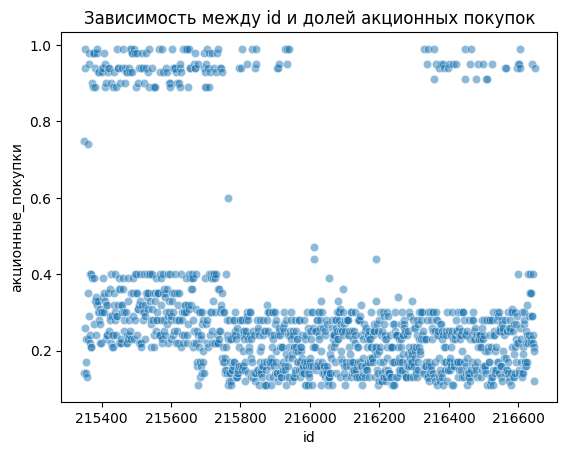

In [45]:
# Построим диаграмму рассеяния между суммой выручки за прошлый и позапрошлый месяцы и выручкой в текущем месяце
graphic_scatter(
    market_total_copy,
    'id',
    'акционные_покупки',
    None,
    'Зависимость между id и долей акционных покупок'
)

Действительно, покупатели разделились на кластеры: один кластер имеет долю акционных покупок до 40 %, а другой кластер - 90-100 %, то есть почти все покупки происходят у этого кластера только по акции. Эти покупатели отслеживают акции и только тогда делают покупки.

### Коэффициенты корреляции
Не все признаки распределены нормально, поэтому найдём коэффициенты корреляции Спирмена, а не Пирсона.

In [46]:
# Выберем числовые данные
market_total_num = market_total.select_dtypes(include='number')
market_total_num.head()

маркет_актив_6_мес  маркет_актив_тек_мес  длительность  \
id                                                               
215349                 4.4                     4           819   
215350                 4.9                     3           539   
215351                 3.2                     5           896   
215352                 5.1                     3          1064   
215353                 3.3                     4           762   

        акционные_покупки  средний_просмотр_категорий_за_визит  \
id                                                               
215349               0.75                                    4   
215350               0.14                                    5   
215351               0.99                                    5   
215352               0.94                                    3   
215353               0.26                                    4   

        неоплаченные_продукты_штук_квартал  ошибка_сервиса  страниц_за_визит  \
id                                                                             
215349                                   4               2                 5   
215350                                   2               1                 5   
215351                                   0               6                 4   
215352                                   2               3                 2   
215353                                   1               1                 4   

        выручка_позапрошлый_месяц  выручка_предыдущий_месяц  \
id                                                            
215349                     4472.0                    5216.0   
215350                     4826.0                    5457.5   
215351                     4793.0                    6158.0   
215352                     4594.0                    5807.5   
215353                     5124.0                    4738.5   

        выручка_текущий_месяц  минут_предыдущий_месяц  минут_текущий_месяц  
id                                                                          
215349                 4971.6                      12                   10  
215350                 5058.4                       8                   13  
215351                 6610.4                      11                   13  
215352                 5872.5                       8                   11  
215353                 5388.5                      10                   10

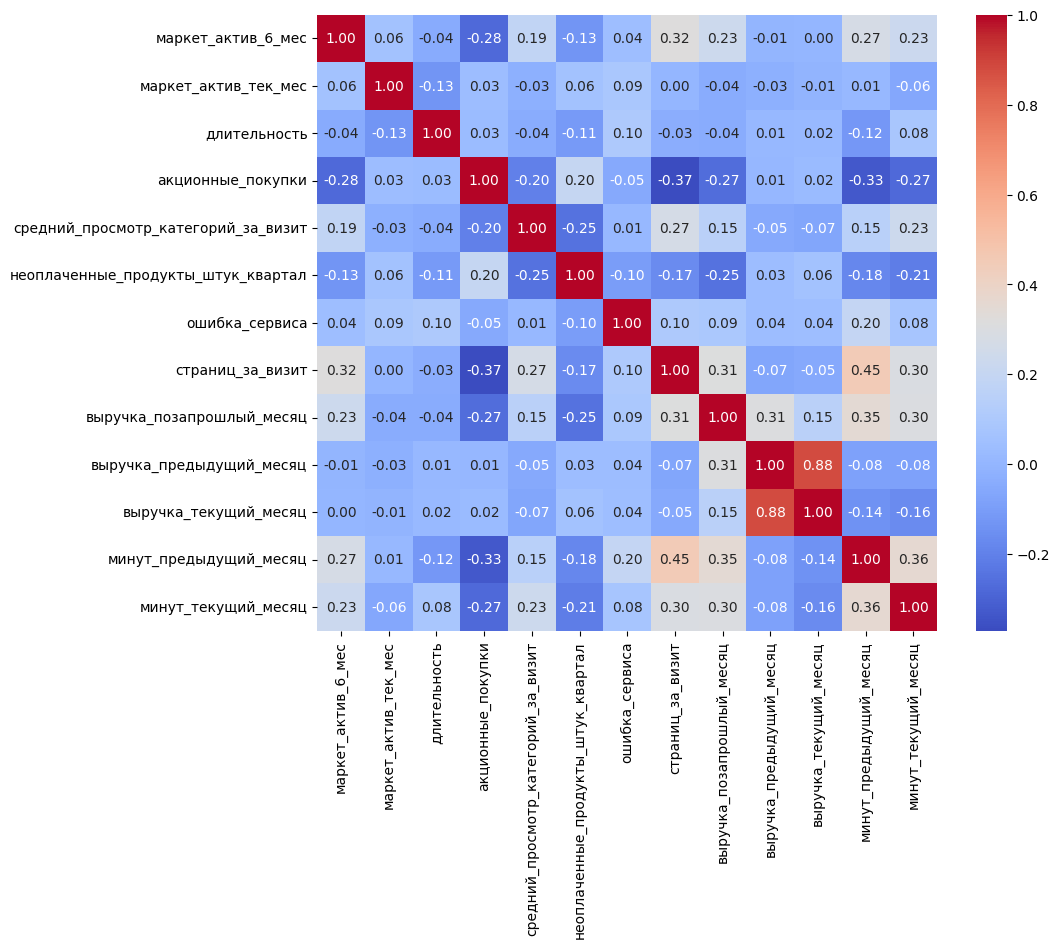

In [47]:
# Построим тепловую карту корреляции
plt.subplots(figsize=(10, 8))
sns.heatmap(market_total_num.corr(method='spearman'), cmap='coolwarm', annot=True, fmt='.2f')
plt.show()

Связь между признаками `Выручка предыдущий месяц` и `Выручка текущий месяц` сильная, коэффициент корреляции Пирсона составляет 0.88. Слабая связь имеется также между признаками `Минут предыдущий месяц` и `Страниц за визит`, `Минут предыдущий месяц` и `Минут текущий месяц`, `Маркет актив 6 мес` и `Страниц за визит`, `Минут текущий месяц` и `Страниц за визит`. Другие признаки не продемонстрировали взаимосвязи.

In [48]:
# Проверим мультиколлинеарность с помощью VIF
# Составим расчётную матрицу для модели, используя покупательскую активность в качестве таргета
y, X = dmatrices(
    'покупательская_активность ~ тип_сервиса+разрешить_сообщать+маркет_актив_6_мес+маркет_актив_тек_мес+\
    длительность+акционные_покупки+популярная_категория+средний_просмотр_категорий_за_визит+\
    неоплаченные_продукты_штук_квартал+ошибка_сервиса+страниц_за_визит+выручка_предыдущий_месяц+\
    выручка_текущий_месяц+минут_предыдущий_месяц+минут_текущий_месяц',
    data=market_total,
    return_type='dataframe'
)
# Вычислим VIF для каждой независимой переменной
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['variable'] = X.columns

# Выведем на экран значения VIF для каждой независимой переменной
vif

VIF                                           variable
0   175.066003                                          Intercept
1     1.182597                            тип_сервиса[T.стандарт]
2     1.111505                          разрешить_сообщать[T.нет]
3     1.704937      популярная_категория[T.Косметика и аксесуары]
4     1.486756            популярная_категория[T.Кухонная посуда]
5     1.555630  популярная_категория[T.Мелкая бытовая техника ...
6     1.590008  популярная_категория[T.Техника для красоты и з...
7     1.843513           популярная_категория[T.Товары для детей]
8     1.221626                                 маркет_актив_6_мес
9     1.074337                               маркет_актив_тек_мес
10    1.249163                                       длительность
11    1.189689                                  акционные_покупки
12    1.241591                средний_просмотр_категорий_за_визит
13    1.230077                 неоплаченные_продукты_штук_квартал
14    1.088126                                     ошибка_сервиса
15    1.439214                                   страниц_за_визит
16    3.636757                           выручка_предыдущий_месяц
17    3.685313                              выручка_текущий_месяц
18    1.527896                             минут_предыдущий_месяц
19    1.317617                                минут_текущий_месяц

Значение VIF для большинства независимых переменных близко к 1, это указывает на то, что корреляция между этими признаками и другими независимыми признаками недостаточно серьёзна, чтобы требовать внимания. Для двух переменных значения VIF около 3,6, это указывает на умеренную корреляцию этих признаков с другими. Итак, действительно, мультиколлинеарность в этих данных не является проблемой.

In [49]:
market_total.head()

покупательская_активность тип_сервиса разрешить_сообщать  \
id                                                                
215349                 Снизилась     премиум                 да   
215350                 Снизилась    стандарт                нет   
215351                 Снизилась    стандарт                 да   
215352                 Снизилась    стандарт                нет   
215353                 Снизилась    стандарт                 да   

        маркет_актив_6_мес  маркет_актив_тек_мес  длительность  \
id                                                               
215349                 4.4                     4           819   
215350                 4.9                     3           539   
215351                 3.2                     5           896   
215352                 5.1                     3          1064   
215353                 3.3                     4           762   

        акционные_покупки популярная_категория  \
id                                               
215349               0.75     Товары для детей   
215350               0.14    Домашний текстиль   
215351               0.99     Товары для детей   
215352               0.94     Товары для детей   
215353               0.26    Домашний текстиль   

        средний_просмотр_категорий_за_визит  \
id                                            
215349                                    4   
215350                                    5   
215351                                    5   
215352                                    3   
215353                                    4   

        неоплаченные_продукты_штук_квартал  ошибка_сервиса  страниц_за_визит  \
id                                                                             
215349                                   4               2                 5   
215350                                   2               1                 5   
215351                                   0               6                 4   
215352                                   2               3                 2   
215353                                   1               1                 4   

        выручка_позапрошлый_месяц  выручка_предыдущий_месяц  \
id                                                            
215349                     4472.0                    5216.0   
215350                     4826.0                    5457.5   
215351                     4793.0                    6158.0   
215352                     4594.0                    5807.5   
215353                     5124.0                    4738.5   

        выручка_текущий_месяц  минут_предыдущий_месяц  минут_текущий_месяц  
id                                                                          
215349                 4971.6                      12                   10  
215350                 5058.4                       8                   13  
215351                 6610.4                      11                   13  
215352                 5872.5                       8                   11  
215353                 5388.5                      10                   10

Построим две матрицы корреляции `phik`, одну для покупателей со сниженной активностью, другую - с сохраняющейся активностью.

In [50]:
# Разделим датафрейм market_total на два по покупательской активности
market_total_1 = market_total.query('покупательская_активность == "Снизилась"').drop('покупательская_активность', axis=1)
market_total_0 = market_total.query('покупательская_активность == "Прежний уровень"').drop('покупательская_активность', axis=1)

# создаём список с наименованиями непрерывных признаков
interval_cols = [
    'маркет_актив_6_мес',
    'акционные_покупки',
    'выручка_позапрошлый_месяц',
    'выручка_предыдущий_месяц',
    'выручка_текущий_месяц'
]

# считаем корреляции
phik_overview_1 = market_total_1.phik_matrix(interval_cols=interval_cols)
phik_overview_0 = market_total_0.phik_matrix(interval_cols=interval_cols)
print(phik_overview_1.shape)
print(phik_overview_0.shape) 

(16, 16)
(16, 16)


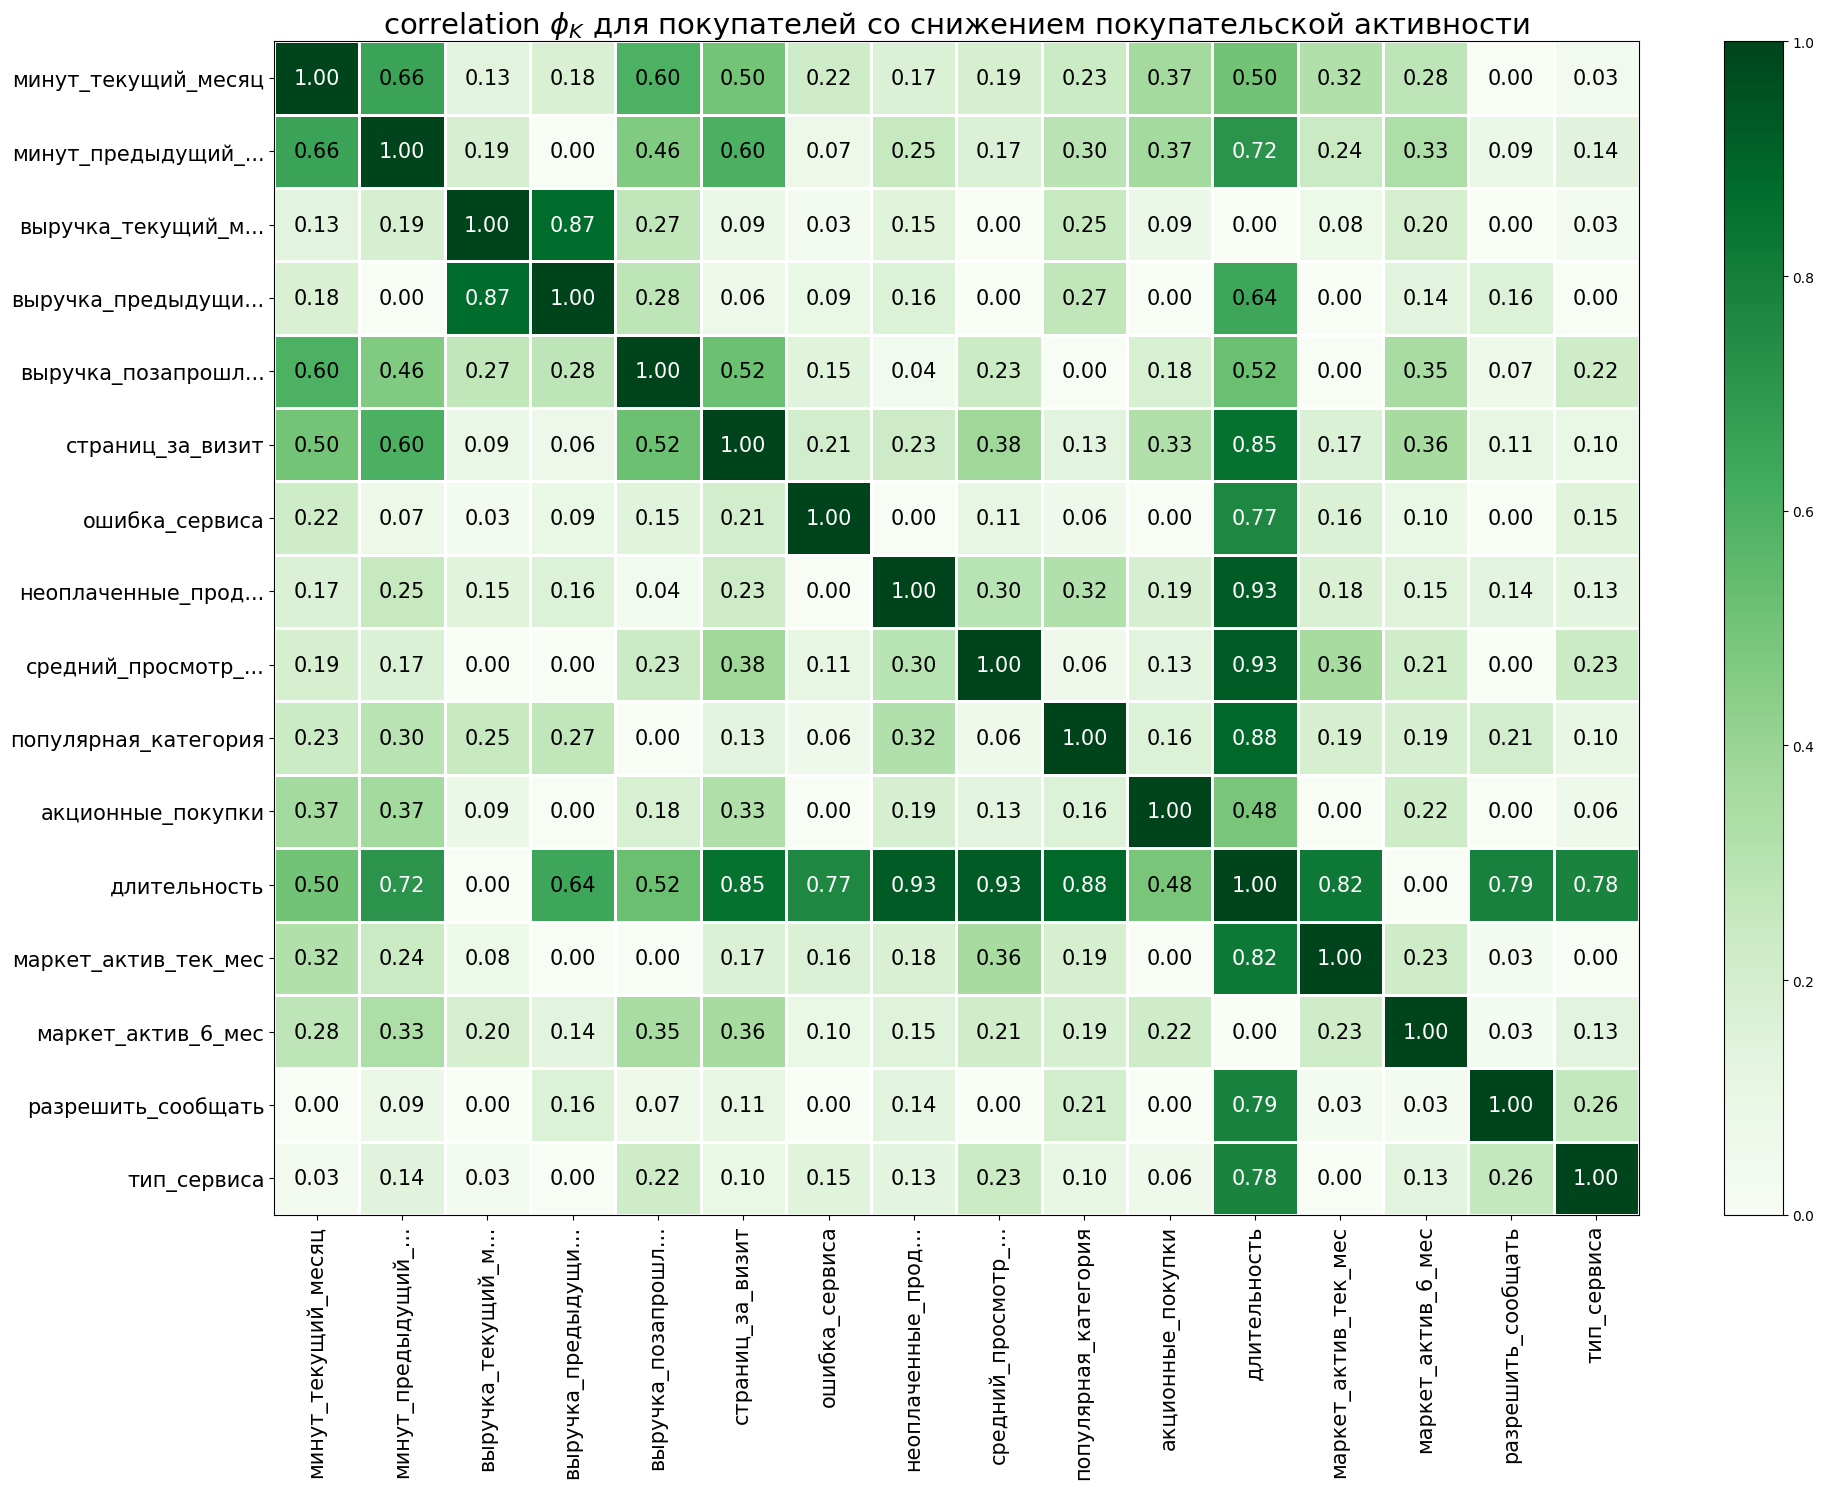

In [51]:
plot_correlation_matrix(
    phik_overview_1.values,
    x_labels=phik_overview_1.columns,
    y_labels=phik_overview_1.index,
    vmin=0, vmax=1, color_map='Greens',
    title=r'correlation $\phi_K$ для покупателей со снижением покупательской активности',
    fontsize_factor=1.5,
    figsize=(20, 15)
)

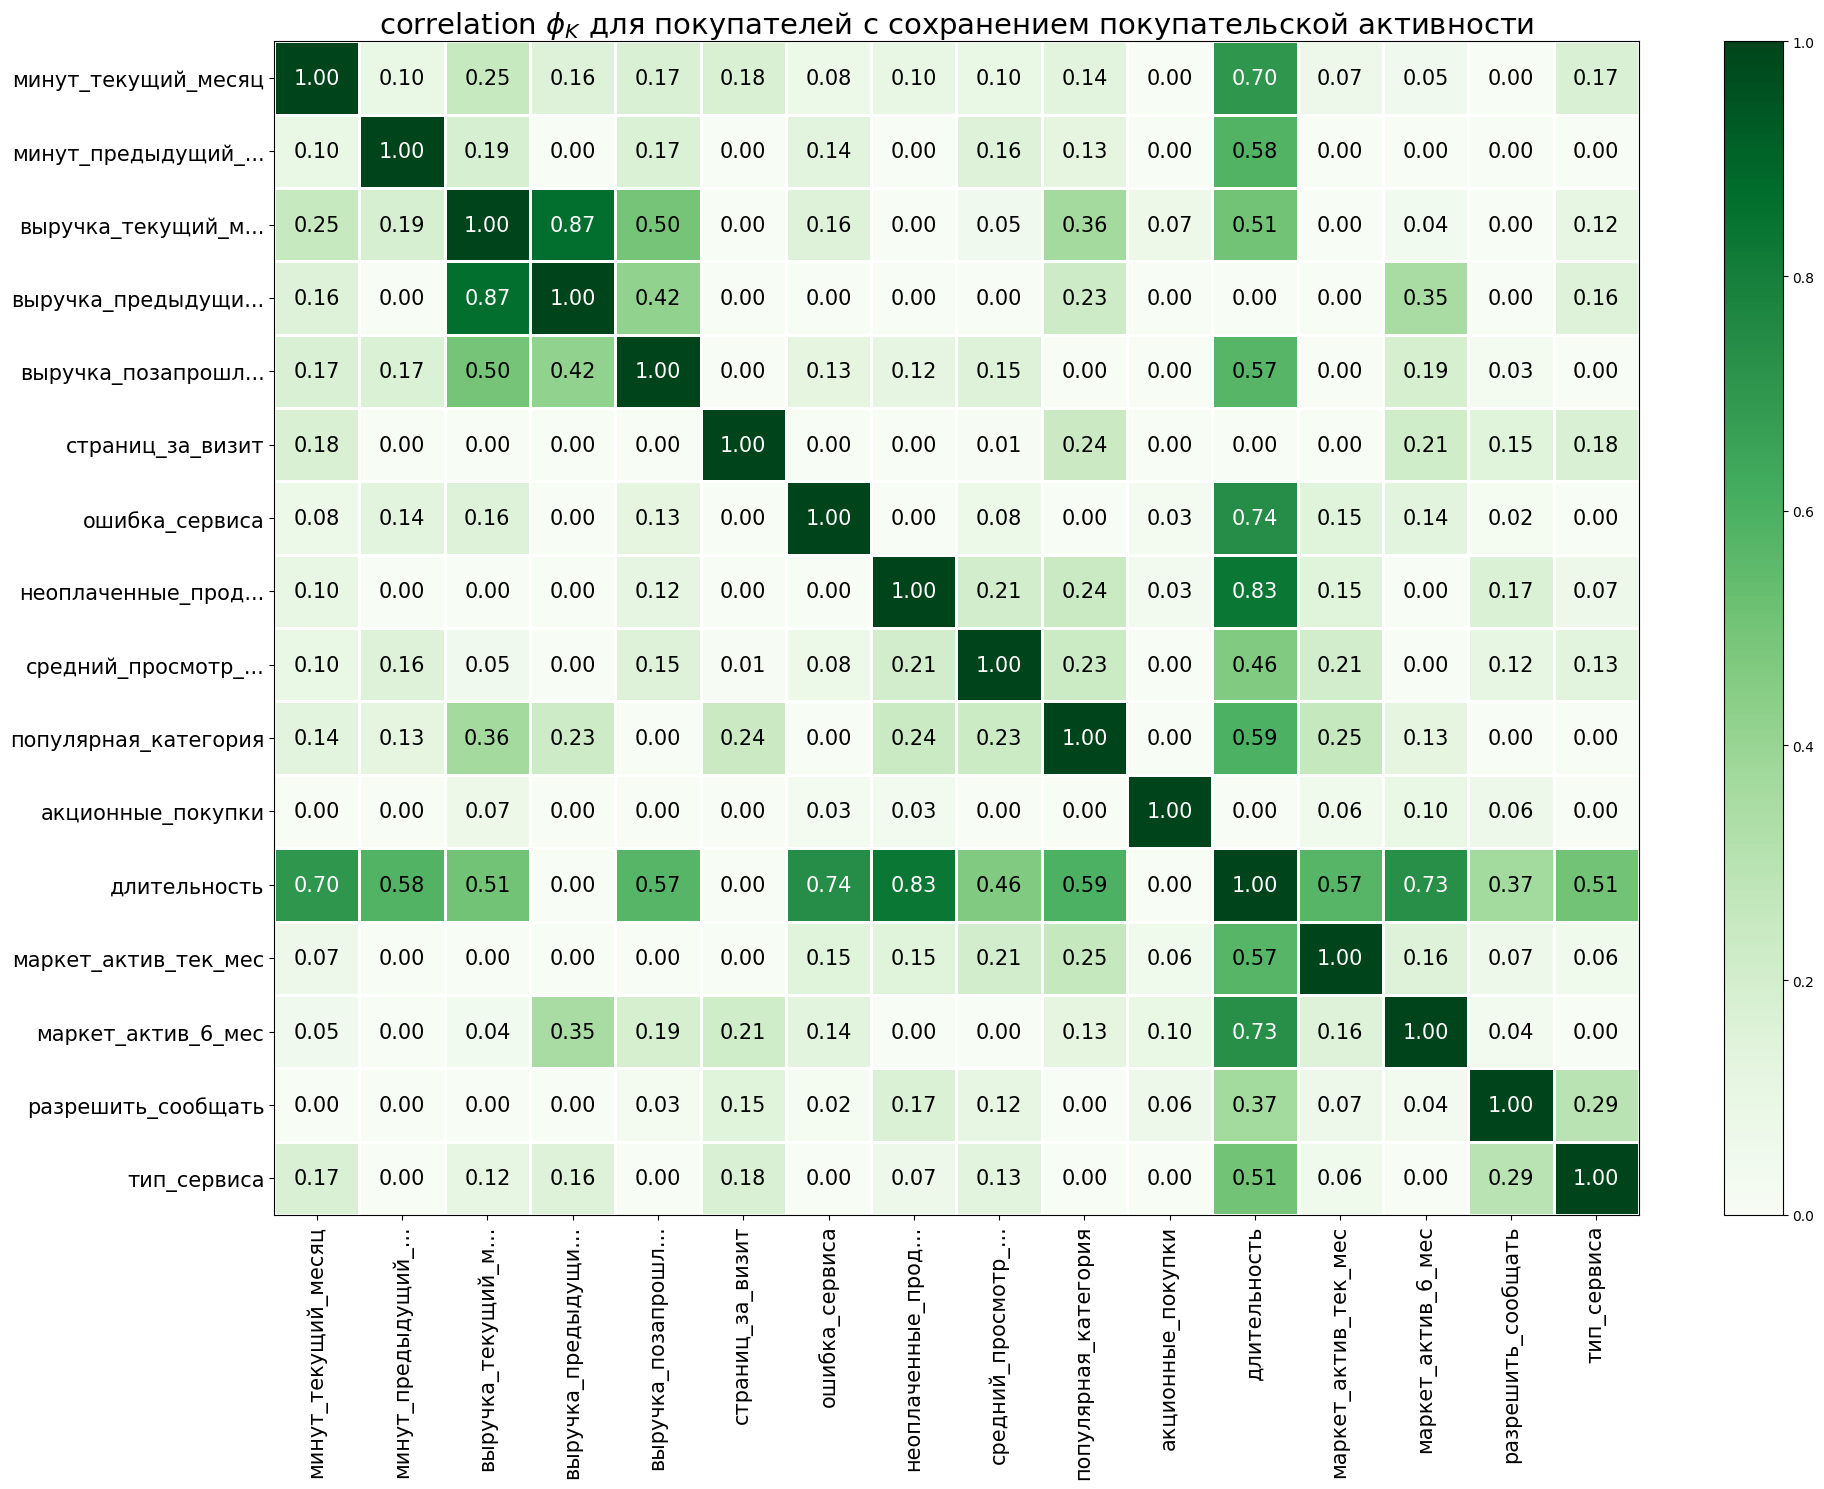

In [52]:
plot_correlation_matrix(
    phik_overview_0.values,
    x_labels=phik_overview_0.columns,
    y_labels=phik_overview_0.index,
    vmin=0, vmax=1, color_map='Greens',
    title=r'correlation $\phi_K$ для покупателей с сохранением покупательской активности',
    fontsize_factor=1.5,
    figsize=(20, 15)
)

На построенных матрицах можно увидеть, что длительность пребывания клиентом сайта с момента регистрации имеет достаточно сильную корреляцию почти со всеми другими признаками, особенно у покупателей со снижением активности, что говорит о формирующемся со временем поведением клиентов.  
Количество минут, проведённых на сайте, вполне логично коррелирует с числом просмотренных страниц.  
Есть в двух матрицах заметные различия.  
У покупателей со снижением активности акционные покупки коррелируют с минутами на сайте, числом страниц за визит, популярной категорией (у покупателей с сохранением активности эти корреляции 0). Также заметно выше корреляция акционных покупок с маркетинговой активностью. Кроме того, есть небольшая корреляция с выручками (у покупателей с сохраняющейся активностью она нулевая). Это говорит о том, что акции для покупателей со снижением активности имеют большое значение.  
У покупателей с сохраняющейся активностью выше корреляция между популярной категорией и выручкой, числом страниц за визит, числом просмотренных категорий. То есть для них важнее именно свои избранные категории товаров.

**Вывод.** Сильную взаимосвязь показали только показатели `Выручка предыдущий месяц` и `Выручка текущий месяц`. Коэффициент корреляции Спирмена составил 0.88. Мультиколлинеарность признаков не выявлена.  
Не выявлена она и с помощью VIF.  
Матрицы корреляции phik показали, что у покупателей со сниженной активностью приоритетом являются акции, а у покупателей с сохранением активности - избранные категории товаров.

## Использование пайплайнов в моделировании
Наша задача предсказать снижение покупательской активности клиентов интернет-магазина. Для выполнения этой задачи построим несколько моделей и выберем из них лучшую. Для этого используем пайплайны.

### Подготовка выборок
Целевой признак - `Покупательская активность`. Это бинарный признак. Его значения нужно перевести в значения `0` и `1`.  
Данные нужно разделить на тренировочную и тестовую выборки.

Признаки `Тип_сервиса`, `Разрешить_сообщать` нужно кодировать с помощью `OneHotEncoder`.  

Признак `Популярная_категория` нужно кодировать с помощью `OrdinalEncoder`.

Признаки `Маркет_актив_6_мес`, `Маркет_актив_тек_мес`, `Длительность`, `Акционные_покупки`, `Средний_просмотр_категорий_за_визит`, `Неоплаченные_продукты_штук_квартал`, `Ошибка_сервиса`, `Страниц_за_визит`, `Выручка_предыдущий_месяц`, `Выручка_текущий_месяц`, `Минут_предыдущий_месяц`, `Минут_текущий_месяц` нужно масштабировать.

In [53]:
# Для преобразования целевого признака `Покупательская_активность` в бинарный признак со значениями `0` и `1`
# заменим в таблице `market_total` значения в столбце `Покупательская_активность`
market_total['покупательская_активность'] = market_total['покупательская_активность']\
    .apply(lambda x: 1 if x == 'Снизилась' else 0)
market_total.head()

покупательская_активность тип_сервиса разрешить_сообщать  \
id                                                                 
215349                          1     премиум                 да   
215350                          1    стандарт                нет   
215351                          1    стандарт                 да   
215352                          1    стандарт                нет   
215353                          1    стандарт                 да   

        маркет_актив_6_мес  маркет_актив_тек_мес  длительность  \
id                                                               
215349                 4.4                     4           819   
215350                 4.9                     3           539   
215351                 3.2                     5           896   
215352                 5.1                     3          1064   
215353                 3.3                     4           762   

        акционные_покупки популярная_категория  \
id                                               
215349               0.75     Товары для детей   
215350               0.14    Домашний текстиль   
215351               0.99     Товары для детей   
215352               0.94     Товары для детей   
215353               0.26    Домашний текстиль   

        средний_просмотр_категорий_за_визит  \
id                                            
215349                                    4   
215350                                    5   
215351                                    5   
215352                                    3   
215353                                    4   

        неоплаченные_продукты_штук_квартал  ошибка_сервиса  страниц_за_визит  \
id                                                                             
215349                                   4               2                 5   
215350                                   2               1                 5   
215351                                   0               6                 4   
215352                                   2               3                 2   
215353                                   1               1                 4   

        выручка_позапрошлый_месяц  выручка_предыдущий_месяц  \
id                                                            
215349                     4472.0                    5216.0   
215350                     4826.0                    5457.5   
215351                     4793.0                    6158.0   
215352                     4594.0                    5807.5   
215353                     5124.0                    4738.5   

        выручка_текущий_месяц  минут_предыдущий_месяц  минут_текущий_месяц  
id                                                                          
215349                 4971.6                      12                   10  
215350                 5058.4                       8                   13  
215351                 6610.4                      11                   13  
215352                 5872.5                       8                   11  
215353                 5388.5                      10                   10

In [54]:
# Зададим константы
RANDOM_STATE=42
TEST_SIZE=0.25

# Разделим данные на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(
    market_total.drop(['покупательская_активность'], axis=1),
    market_total['покупательская_активность'],
    test_size=TEST_SIZE,
    random_state=RANDOM_STATE,
    stratify=market_total['покупательская_активность']
)

In [55]:
# Обозначим типы исходных данных
ohe_columns = ['тип_сервиса', 'разрешить_сообщать']

ord_columns = ['популярная_категория']

num_columns = [
    'маркет_актив_6_мес',
    'маркет_актив_тек_мес',
    'длительность',
    'акционные_покупки',
    'средний_просмотр_категорий_за_визит',
    'неоплаченные_продукты_штук_квартал',
    'ошибка_сервиса',
    'страниц_за_визит',
    'выручка_предыдущий_месяц',
    'выручка_текущий_месяц',
    'минут_предыдущий_месяц',
    'минут_текущий_месяц'
]

### Создание пайплайнов

In [56]:
# Добавляем OHE-кодирование в пайплайн
ohe_pipe = Pipeline(
    [
        (
            'simpleImputer_ohe',
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        ),
        (
            'ohe',
            OneHotEncoder(drop='first', handle_unknown='error')
        )      
    ]
)

# Добавляем Ordinal-кодирование в пайплайн
ord_pipe = Pipeline(
    [
        (
            'simpleImputer_before_ord',
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        ),
        (
            'ord',
            OrdinalEncoder(
                handle_unknown='use_encoded_value', unknown_value=np.nan
            )
        ),
        (
            'simpleImputer_after_ord',
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        )
    ]
)

# Объединяем операции по подготовке данных
data_preprocessor = ColumnTransformer(
    [
        ('ohe', ohe_pipe, ohe_columns),
        ('ord', ord_pipe, ord_columns),
        ('num', StandardScaler(), num_columns)
    ],
    remainder='passthrough'
)

# Создаём итоговый пайплайн, присоединяем шаг с моделированием,
# используем модель DecisionTreeClassifier
pipe_final = Pipeline(
    [
        ('preprocessor', data_preprocessor),
        ('models', DecisionTreeClassifier(random_state=RANDOM_STATE))
    ]
)


warnings.filterwarnings('ignore')

In [57]:
# Подбираем гиперпараметры для каждой модели
param_distributions = [
    {
        'models': [KNeighborsClassifier()],
        'models__n_neighbors': range(1, 20),
        'preprocessor__num': [StandardScaler(), MinMaxScaler()]
    },
    {
        'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        'models__max_depth': range(2, 11),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
    },
    {
        'models': [LogisticRegression(random_state=RANDOM_STATE)],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
    },
    {
        'models': [SVC(random_state=RANDOM_STATE)],
        'models__kernel': ['linear', 'rbf', 'poly'],
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  

    }
]

In [58]:
%%time
# Перебираем варианты для каждой модели
randomized_search = RandomizedSearchCV(
    pipe_final, 
    param_distributions=param_distributions, 
    scoring='roc_auc', 
    random_state=RANDOM_STATE,
    n_jobs=-1
)

randomized_search.fit(X_train, y_train)

CPU times: total: 109 ms
Wall time: 1.09 s


RandomizedSearchCV(estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('ohe',
                                                                               Pipeline(steps=[('simpleImputer_ohe',
                                                                                                SimpleImputer(strategy='most_frequent')),
                                                                                               ('ohe',
                                                                                                OneHotEncoder(drop='first'))]),
                                                                               ['тип_сервиса',
                                                                                'разрешить_сообщать']),
                                                                              ('ord',
                                                                               Pipeline(steps=[('simpleImputer_before_ord',
                                                                                                SimpleImputer(strateg...
                                         'preprocessor__num': [StandardScaler(),
                                                               MinMaxScaler(),
                                                               'passthrough']},
                                        {'models': [LogisticRegression(random_state=42)],
                                         'preprocessor__num': [StandardScaler(),
                                                               MinMaxScaler(),
                                                               'passthrough']},
                                        {'models': [SVC(random_state=42)],
                                         'models__kernel': ['linear', 'rbf',
                                                            'poly'],
                                         'preprocessor__num': [StandardScaler(),
                                                               MinMaxScaler(),
                                                               'passthrough']}],
                   random_state=42, scoring='roc_auc')

In [59]:
print('Метрика ROC_AUC для лучшей модели:', round(randomized_search.best_score_, 2))
print('Лучшая модель и её параметры:\n\n', randomized_search.best_estimator_)

Метрика ROC_AUC для лучшей модели: 0.9
Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first'))]),
                                                  ['тип_сервиса',
                                                   'разрешить_сообщать']),
                                                 ('ord',
                                                  Pipeline(steps=[('simpleImputer_before_ord',
                                                                   SimpleImputer(strategy='most_frequent')),
       

Лучше всего справилась модель LogisticRegression() и масштабированием MinMaxScaler(). 

In [60]:
# Выведем результаты поиска с перебором гиперпараметров
result = pd.DataFrame(randomized_search.cv_results_)
print(result[
    ['rank_test_score', 'param_models', 'mean_test_score','params']
].sort_values('rank_test_score')) 

   rank_test_score                             param_models  mean_test_score  \
6                1      LogisticRegression(random_state=42)         0.896292   
5                2  DecisionTreeClassifier(random_state=42)         0.856524   
8                3  DecisionTreeClassifier(random_state=42)         0.853043   
4                4  DecisionTreeClassifier(random_state=42)         0.842884   
7                5  DecisionTreeClassifier(random_state=42)         0.842465   
0                6                   KNeighborsClassifier()         0.748537   
2                7                   KNeighborsClassifier()         0.735169   
3                8                   KNeighborsClassifier()         0.708974   
9                9                   KNeighborsClassifier()         0.706515   
1               10                   KNeighborsClassifier()         0.694355   

                                              params  
6  {'preprocessor__num': MinMaxScaler(), 'models'...  
5  {'prep

In [61]:
# Получение лучшей модели
best_model = randomized_search.best_estimator_

# Получим прогноз целевого признака по тестовой выборке, используем лучшую модель
y_test_pred = best_model.predict_proba(X_test)[:, 1]
print(f'Метрика ROC_AUC на тестовой выборке: {round(roc_auc_score(y_test, y_test_pred), 2)}')

Метрика ROC_AUC на тестовой выборке: 0.91


**Вывод**. Построены пайплайны, которые перебирают три метода масштабирования, четыре модели и некоторые гиперпараметры моделей. В итоге выбрана лучшая модель `LogisticRegression()` с  методом масштабирования `MinMaxScaler()`. Значение метрики `ROC_AUC`, полученное после перебора, составило 0.9. Время перебора моделей и гиперпараметров составило 1,04 секунды. 

*Самая подходящая метрика для выбора лучшей модели ROC_AUC.* Признак бинарный. Наши данные не сбалансированы, значений одного класса целевого признака в 1,61 раза больше, чем другого. Метрика ROC_AUC отлично подходит для бинарной классификации с несбалансированной выборкой.  

При прогнозировании с помощью лучшей модели на тестовой выборке получили значение метрики ROC_AUC 0.91.

## Анализ важности признаков

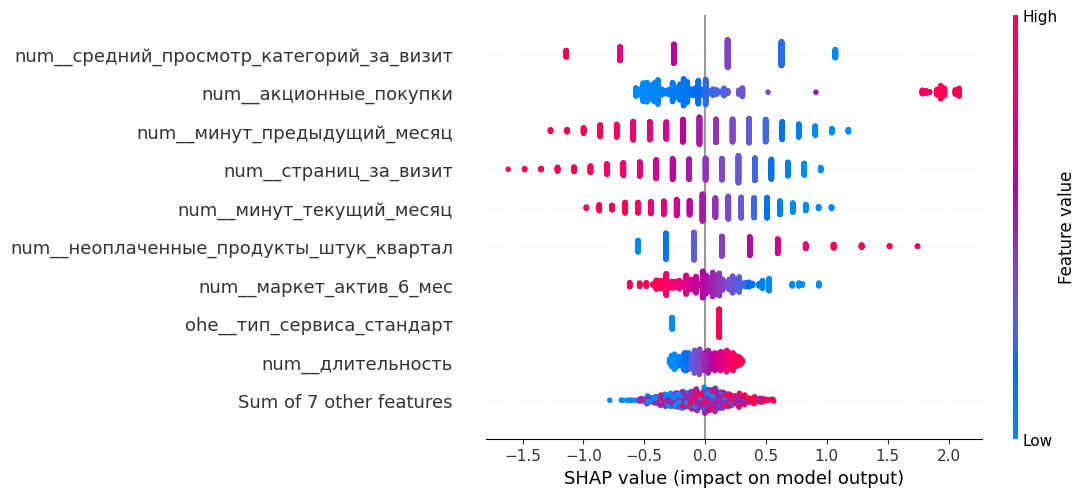

In [62]:
# Получение преобразователя из pipeline
data_preprocessor = best_model.named_steps['preprocessor']

# Применение преобразований к X_train и к X_test
X_train_transformed = data_preprocessor.transform(X_train)
X_test_transformed = data_preprocessor.transform(X_test)

# Получение названий столбцов
feature_names = data_preprocessor.get_feature_names_out()

# Создание explainer с использованием преобразованного X_train
explainer = shap.LinearExplainer(best_model.named_steps['models'], X_train_transformed, feature_names=feature_names)

# Вычисление значений SHAP
shap_values = explainer(X_train_transformed)

# Визуализация
shap.plots.beeswarm(shap_values)

In [63]:
feature_names

array(['ohe__тип_сервиса_стандарт', 'ohe__разрешить_сообщать_нет',
       'ord__популярная_категория', 'num__маркет_актив_6_мес',
       'num__маркет_актив_тек_мес', 'num__длительность',
       'num__акционные_покупки',
       'num__средний_просмотр_категорий_за_визит',
       'num__неоплаченные_продукты_штук_квартал', 'num__ошибка_сервиса',
       'num__страниц_за_визит', 'num__выручка_предыдущий_месяц',
       'num__выручка_текущий_месяц', 'num__минут_предыдущий_месяц',
       'num__минут_текущий_месяц', 'remainder__выручка_позапрошлый_месяц'],
      dtype=object)

Высокие значения признаков `Средний просмотр категорий за визит`, `Страниц за визит`, `Минут предыдущий месяц`, `Минут текущий месяц`, `Маркет актив 6 мес` уменьшают вероятность отнесения пользователя к классу 1, то есть вероятность снижения покупательской активности пользователя. Чем выше значение признака `Акционные покупки`, то есть чем выше доля акционных покупок у пользователя, тем больше вероятность отнесения к классу 1, то есть снижения покупательской активности пользователя. Признак `Неоплаченные продукты штук квартал` при его увеличении оказывает влияние на увеличение отнесения признака к классу 1, то есть повышают вероятность снижения покупательской активности клиента.

По всей видимости, мало значимы для модели признаки, которые не вошли в beeswarm, так как их значения Шепли небольшие. К таким признакам относятся `Тип сервиса`, `Разрешить сообщать`, `Маркет актив тек мес`, `Длительность`, `Ошибка сервиса`, `Выручка предыдущий месяц`, `Выручка текущий месяц`.  

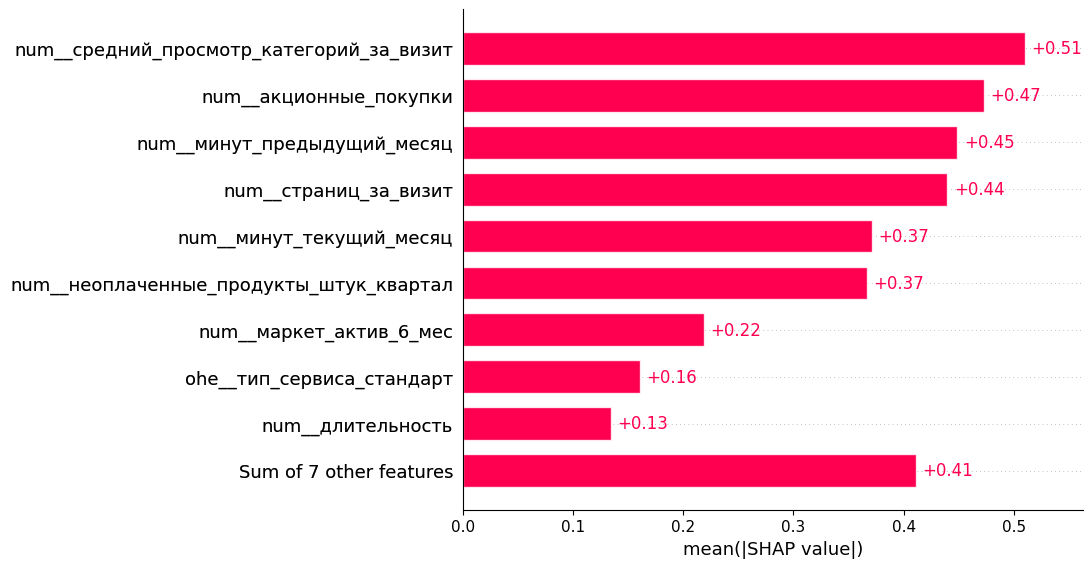

In [64]:
# Построим график общей значимости признаков
shap.plots.bar(shap_values)

Согласно графику общей значимости признаков, самые важные признаки - `Средний просмотр категорий за визит`, `Акционные покупки`, `Минут предыдущий месяц`, `Страниц за визит`, `Минут текущий месяц`, `Неоплаченные продукты штук квартал` `Маркет актив 6 мес`, то есть этот график выделил те же самые признаки как самые важные.

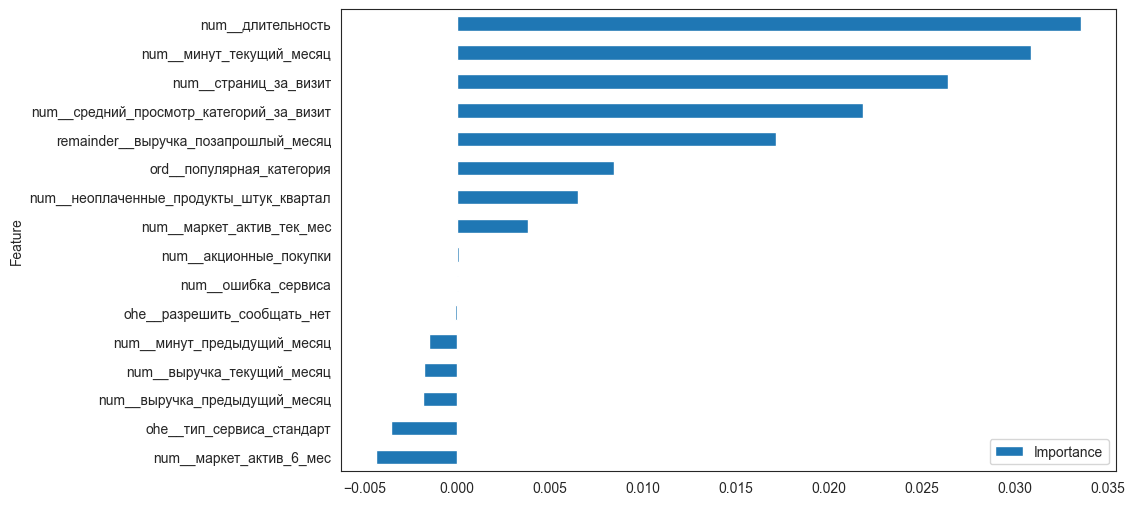

In [65]:
# Построим ещё один график с помощью Permutation Importance
permutation = permutation_importance(best_model, X_test, y_test, scoring = 'roc_auc')

feature_importance = pd.DataFrame({'Feature': feature_names, 'Importance': permutation['importances_mean']})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
sns.set_style('white')
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))
plt.show()

Permutation Importance указывает на важность признаков `Минут текущий месяц`, `Длительность`, `Страниц за визит`, `Средний просмотр категорий за визит`, `Выручка позапрошлый месяц`, `Популярная категория`.

**Вывод.** Сильнее всего влияют на целевой признак признаки `Средний просмотр категорий за визит`, `Страниц за визит`, `Минут предыдущий месяц`, `Минут текущий месяц`, а также `Акционные покупки`, `Популярная категория`, `Средний просмотр категорий за визит`, `Выручка позапрошлый месяц`.

Таким образом, признаки, описывающие поведение покупателя на сайте, оказывают самое большое влияние на целевой признак.  
При моделировании можно малозначимые признаки исключать из совокупности, а на важные признаки обращать внимание при принятии бизнес-решений.

## Сегментация покупателей

### Выбор сегмента

In [66]:
# Объединим выборку X_test с данными о прибыльности покупателей из таблицы money
data_customer = X_test.merge(money, on='id', how='inner')

# Добавим столбец `Прогноз покупательской активности`
data_customer['прогноз_покупательской_активности'] = y_test_pred

# Проверим
information(data_customer)

id тип_сервиса разрешить_сообщать  маркет_актив_6_мес  \
0  216446    стандарт                 да                 5.3   
1  215469     премиум                 да                 4.1   
2  216301     премиум                 да                 3.9   
3  215713    стандарт                 да                 4.6   
4  215500    стандарт                 да                 3.5   

   маркет_актив_тек_мес  длительность  акционные_покупки  \
0                     5           433               0.91   
1                     3           813               0.22   
2                     5           410               0.20   
3                     5           293               0.24   
4                     4           573               0.40   

             популярная_категория  средний_просмотр_категорий_за_визит  \
0  Техника для красоты и здоровья                                    1   
1               Домашний текстиль                                    3   
2           Косметика и аксесуары                                    3   
3                Товары для детей                                    1   
4           Косметика и аксесуары                                    2   

   неоплаченные_продукты_штук_квартал  ошибка_сервиса  страниц_за_визит  \
0                                   1               0                 7   
1                                   3               4                 5   
2                                   1               5                14   
3                                   3               3                 3   
4                                   4               1                 4   

   выручка_позапрошлый_месяц  выручка_предыдущий_месяц  выручка_текущий_месяц  \
0                     5160.0                    4712.0                 5230.7   
1                     4889.0                    5403.5                 5228.0   
2                     5348.0                    5052.5                 4926.4   
3                     4872.0                    4821.0                 5221.4   
4                     4278.0                    4137.0                 3808.1   

   минут_предыдущий_месяц  минут_текущий_месяц  прибыль  \
0                      15                   20     4.47   
1                      12                    8     3.76   
2                      17                   13     4.34   
3                      12                   14     4.42   
4                      11                   12     4.99   

   прогноз_покупательской_активности  
0                           0.728296  
1                           0.570803  
2                           0.073052  
3                           0.706359  
4                           0.827894

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325 entries, 0 to 324
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   325 non-null    int64  
 1   тип_сервиса                          325 non-null    object 
 2   разрешить_сообщать                   325 non-null    object 
 3   маркет_актив_6_мес                   325 non-null    float64
 4   маркет_актив_тек_мес                 325 non-null    int64  
 5   длительность                         325 non-null    int64  
 6   акционные_покупки                    325 non-null    float64
 7   популярная_категория                 325 non-null    object 
 8   средний_просмотр_категорий_за_визит  325 non-null    int64  
 9   неоплаченные_продукты_штук_квартал   325 non-null    int64  
 10  ошибка_сервиса                       325 non-null    int64  
 11  страниц_за_визит                

None

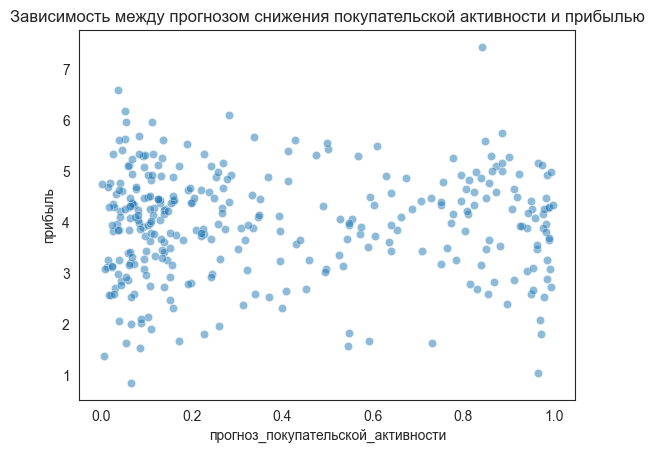

In [67]:
# Построим диаграмму рассеяния между прогнозом снижения активности и прибыльностью
graphic_scatter(
    data_customer,
    'прогноз_покупательской_активности',
    'прибыль',
    None,
    'Зависимость между прогнозом снижения покупательской активности и прибылью'
)

На графике точки рассредоточились в двух сторонах: с низкой вероятностью снижения покупательской активности и с высокой. Граница проходит примерно в значении 0,7. Границу прибыльности можно провести в значении 3,5. Выберем из общей таблицы клиентов с высокой долей уверенности прогноза снижения покупательской активности и высокой прибыльностью, то есть клиентов, на которых надо обратить особое внимание.


### Анализ важных признаков в сегменте
В сегменте покупателей со снижающейся покупательской активностью, приносящих хорошую прибыль, рассмотрим один из важнейших по SHAP признаков - `долю акционных покупок`.

In [68]:
# Выделим сегмент покупателей с прогнозом снижения активности и высокой прибыльностью
data_customer_attention = data_customer.query('(прогноз_покупательской_активности > 0.7) & (прибыль	 > 3.5)')

# Переведём признак акционные покупки в бинарный признак с границей 0,6, назовём его "акционность"
data_customer_attention['акционность'] = data_customer_attention['акционные_покупки']\
.apply(lambda x: 1 if x >= 0.6 else 0)

# Посмотрим количество "акционных" и "неакционных" клиентов
data_customer_attention['акционность'].value_counts()

акционность
0    33
1    27
Name: count, dtype: int64

Распределение клиентов в сегменте по "акционности" почти равное.

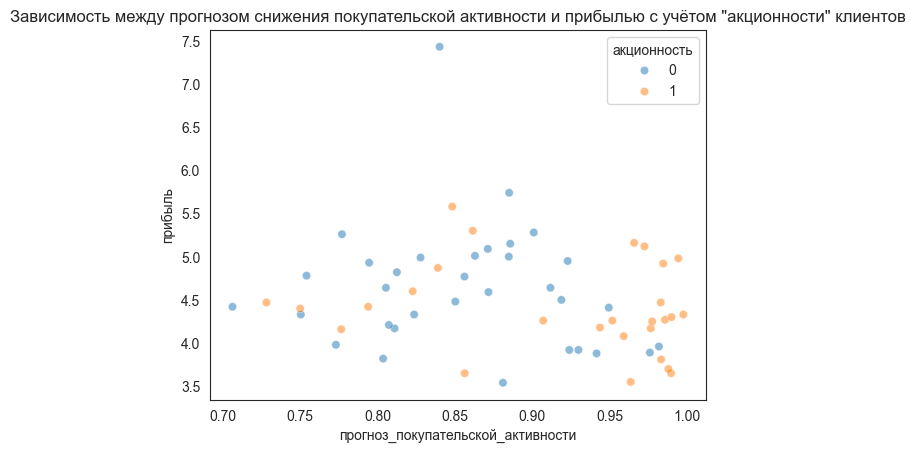

In [69]:
# Построим диаграмму рассеяния между прогнозом снижения покупательской активности
# и прибылью с учётом "акционности" клиентов
graphic_scatter(
    data_customer_attention,
    'прогноз_покупательской_активности',
    'прибыль',
    'акционность',
    'Зависимость между прогнозом снижения покупательской активности и прибылью с учётом "акционности" клиентов'
)

Большая часть "акционных" клиентов в рассматриваемом сегменте имеет крайне высокую вероятность снижения покупательской активности. Рассмотрим этих клиентов в разрезе ещё одного важного признака - маркетинговой активности в среднем за 6 месяцев.

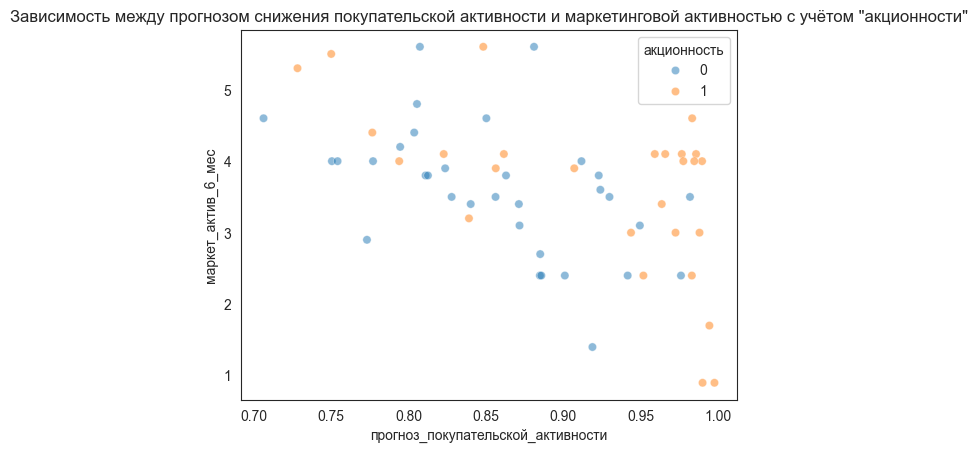

In [70]:
# Построим диаграмму рассеяния между прогнозом снижения покупательской активности
# и средней маркетинговой активностью с учетом "акционности"
graphic_scatter(
    data_customer_attention,
    'прогноз_покупательской_активности',
    'маркет_актив_6_мес',
    'акционность',
    'Зависимость между прогнозом снижения покупательской активности и маркетинговой активностью с учётом "акционности"'
)

"Акционные" клиенты, у которых не самая высокая в среднем маркетинговая активность, имеют самый вероятный прогноз снижения покупательской активности.  

Посмотрим, есть ли взаимосвязь между снижением покупательской активности и ещё одним важным признаком - числом неоплаченных покупок в корзине.

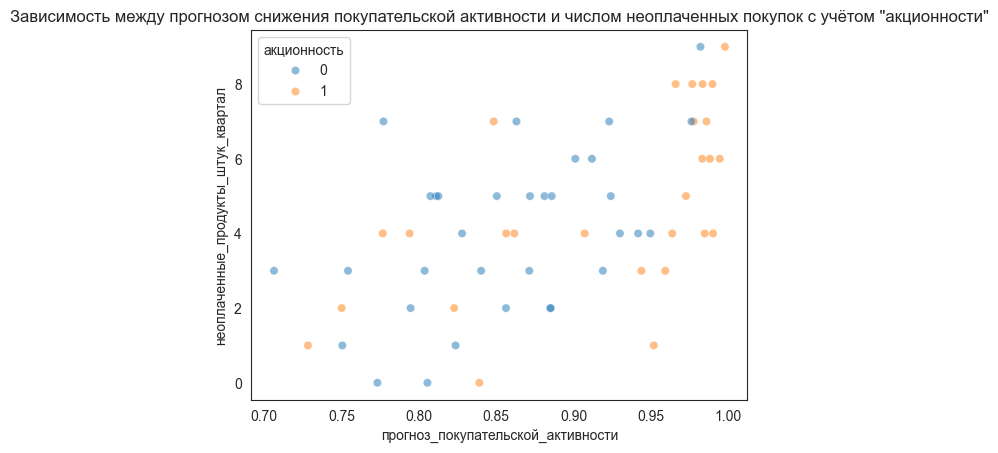

In [71]:
# Построим диаграмму рассеяния между прогнозом снижения покупательской активности
# и числом неоплаченных покупок с учётом "акционности"
graphic_scatter(
    data_customer_attention,
    'прогноз_покупательской_активности',
    'неоплаченные_продукты_штук_квартал',
    'акционность',
    'Зависимость между прогнозом снижения покупательской активности и числом неоплаченных покупок с учётом "акционности"'
)

Рост вероятности снижения покупательской активности показывает корреляцию с увеличением числа неоплаченных покупок в корзине, причём "акционные" клиенты здесь тоже имеют максимальную вероятности снижения активности.

Рассмотрим важные признаки `длительность` и `тип сервиса`.

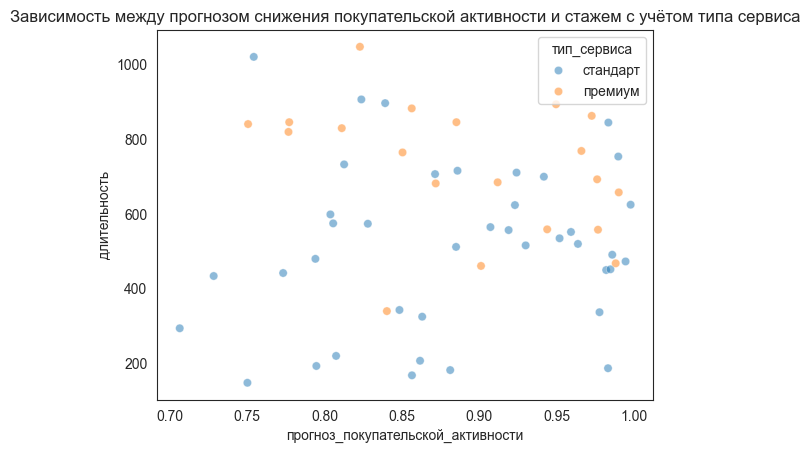

In [72]:
# Построим диаграмму рассеяния между прогнозом снижения покупательской активности
# и стажем с учётом типа сервиса
graphic_scatter(
    data_customer_attention,
    'прогноз_покупательской_активности',
    'длительность',
    'тип_сервиса',
    'Зависимость между прогнозом снижения покупательской активности и стажем с учётом типа сервиса'
)

Почти все клиенты данного сегмента, имеющие тип сервиса `премиум`, имеют самую большую длительность пребывания клиентом сайта.

### Построение plot_tree
Построим plot_tree. Во входные признаки занесём признаки, которые в SHAP выбраны важными.

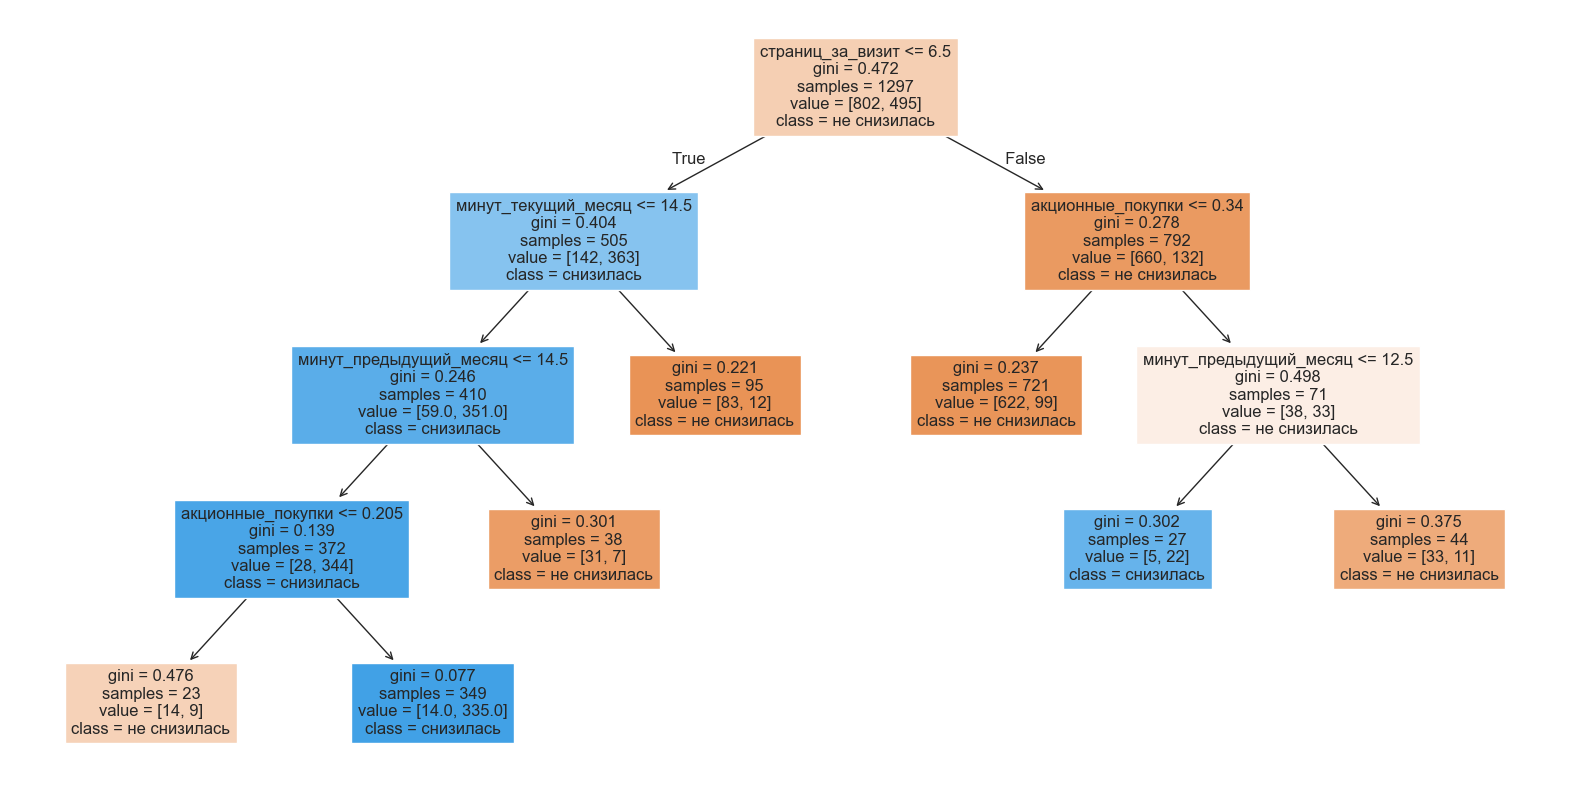

In [73]:
# Зададим константы
RANDOM_STATE=42
TEST_SIZE=0.2

# Делим данные на входные и целевые
X = market_total[[
    'тип_сервиса',
    'маркет_актив_6_мес',
    'маркет_актив_тек_мес',
    'длительность',
    'акционные_покупки',
    'средний_просмотр_категорий_за_визит',
    'неоплаченные_продукты_штук_квартал',
    'страниц_за_визит',
    'минут_предыдущий_месяц',
    'минут_текущий_месяц'
]]
#X = market_total.drop('покупательская_активность', axis=1)
y = market_total['покупательская_активность']

# Создаём список со строковыми категориями для кодирования
cols_ohe = X.select_dtypes('object').columns

# создаём экземпляр класса OneHotEncoder для кодирования
encoder = OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)

# обучаем OneHotEncoder
encoder.fit(X[cols_ohe])

# сохраняем в переменной encoder_col_names список названий новых столбцов 
encoder_col_names = encoder.get_feature_names_out()

X[encoder_col_names] = encoder.transform(X[cols_ohe])

# удаляем преобразованные признаки
X = X.drop(cols_ohe, axis=1)

# Получаем названия столбцов для модели
feature_names = X.columns

# инициализируем модель дерева решений
model = DecisionTreeClassifier(max_leaf_nodes=7, random_state=RANDOM_STATE)
model.fit(X, y)

plt.figure(figsize=(20, 10))
a = plot_tree(model, filled=True, feature_names=feature_names, class_names=['не снизилась', 'снизилась'])

Самая высокая доля не снижающих активность клиентов среди тех клиентов, которые просматривают в среднем более 6,5 страниц за визит и у которых при этом доля акционных покупок менее 34 %.  
Самая большая доля снижающих активность клиентов среди тех, кто просматривает менее 6,5 страниц за визит, в текущем месяце, так же как и в предыдущем, провёл на сайте менее 14,5 минут и доля акционных покупок у них при этом более 20,5 %.

Рассмотрим динамику выручки за три месяца в разрезе популярных категорий товаров.

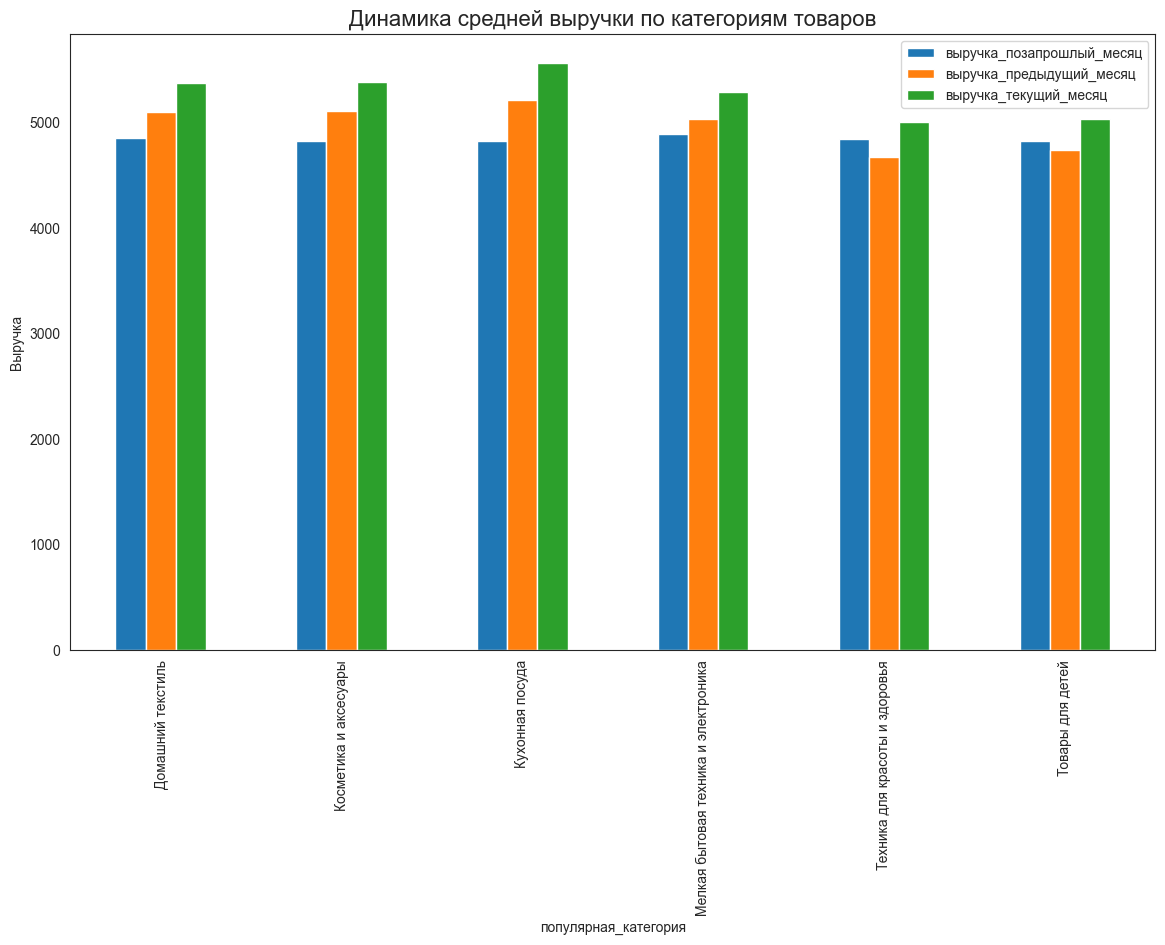

In [74]:
# Сгруппируем покупателей по популярным категориям и посчитаем среднюю выручку одного клиента за каждый месяц
market_total.groupby('популярная_категория').agg(
    {
        'выручка_позапрошлый_месяц': 'mean',
        'выручка_предыдущий_месяц': 'mean',
        'выручка_текущий_месяц': 'mean'
    }
).plot(kind='bar', legend=True, figsize=(14, 8))
plt.ylabel('Выручка')
plt.title('Динамика средней выручки по категориям товаров', fontsize=16);

В позапрошлом месяце средняя выручка клиентов с разными популярными категориями была примерно одинаковой. Но предыдущий и текущий месяцы показали тенденцию роста выручки у клиентов с любимыми категориями `Домашний текстиль`, `Косметика и аксессуары`, `Кухонная посуда`, `Мелкая бытовая техника и электроника`. Эти категории товаров следует включить в персонализированные предложения, не только для клиентов, у кого эта категория популярная, но и для клиентов с другими популярными категориями.

**Вывод.** Выбран сегмент клиентов, для кого высока уверенность модели в том, что их покупательская активность будет снижена, и в то же время, которые приносят хорошую прибыль компании.
В этом сегменте клиенты разделились на две группы – с низкой долей акционных покупок и с высокой долей. Большая часть «акционных клиентов» имеет крайне высокую вероятность снижения покупательской активности. У таких клиентов не самая высокая маркетинговая активность. Отсюда следует, что компании необходимо повысить число маркетинговых коммуникаций с такими клиентами, так как их явно недостаточно.  

Число неоплаченных покупок показало взаимосвязь с вероятностью снижения покупательской активности клиентов, причём особенно это касается «акционных» клиентов. То есть клиент любит акции и много товаров в корзине не оплачивает. Следует принять меры, чтобы стимулировать клиента оплачивать отложенные в корзину товары. Это могут быть дополнительные адресные скидки, или скидки за определённое число позиций в корзине, или бонусы в накопительной бонусной системе.  

Почти все клиенты данного сегмента, имеющие тип сервиса премиум, имеют самую большую длительность пребывания клиентом сайта. То есть это клиенты с длительной историей. Следует продумать меры поощрения клиентов за «стаж»: дополнительный процент в бонусной программе, дополнительный процент скидки за стаж.

Большинство важных признаков относятся к группе признаков, характеризующих поведение на сайте: длительность визита, число просмотренных страниц, число просмотренных категорий. 

Самая высокая доля не снижающих активность клиентов среди тех клиентов, которые просматривают в среднем более 6,5 страниц за визит и у которых при этом доля акционных покупок менее 34 %.
Самая большая доля снижающих активность клиентов среди тех, кто просматривает менее 6,5 страниц за визит, в текущем месяце, так же как и в предыдущем, провёл на сайте менее 14,5 минут и доля акционных покупок у них при этом более 20,5 %.

Сделать это можно путём дополнительного привлечения внимания покупателя с помощью персональных предложений.  

Объектом персональных предложений предпочтительно выбрать товары из категорий `Домашний текстиль`, `Косметика и аксессуары`, `Кухонная посуда`, `Мелкая бытовая техника и электроника`.

Необходимо предоставлять информацию покупателям обо всех акциях, как персонально, для тех, кто дал разрешения, так и с помощью общедоступных рекламных банеров.

## Общий вывод


Была поставлена задача разделить клиентов магазина на два кластера: клиенты с прогнозом снижения покупательской активности и клиенты, у которых по прогнозу покупательская активность останется на прежнем уровне. Далее следовало включить данные о прибыльности клиентов и разработать персонализированные предложения.  

Исходные данные содержали данные о поведении покупателя на сайте, о коммуникациях с покупателем и его продуктовом поведении; о выручке, которую получает магазин с покупателя, то есть сколько покупатель всего потратил за период взаимодействия с сайтом; о времени (в минутах), которое покупатель провёл на сайте в течение периода и о среднемесячной прибыли покупателя за последние 3 месяца: какую прибыль получает магазин от продаж каждому покупателю.  

Названия столбцов во всех датафреймах приведены к единому виду. Пропусков и явных дубликатов в данных нет. Неявные дубликаты (значения с ошибками в категориальных столбцах) обработаны.  

Исследованы исходные данные. Они делятся на 4 группы: характеристики коммуникации сотрудников компании с клиентом, характеристики продуктового поведения клиента, характеристики покупательского поведения клиента и характеристики поведения клиента на сайте.   
В данных имеются категориальные номинальные, категориальные ранговые и количественные признаки.  
Три таблицы объединили в одну.  

Корреляционный анализ показал сильную взаимосвязь только у показателей Выручка предыдущий месяц и Выручка текущий месяц. Коэффициент корреляции Пирсона составил 0.74. Мультиколлинеарность признаков не выявлена.  

Построены пайплайны, которые перебирают три метода масштабирования, четыре модели и некоторые гиперпараметры моделей. В итоге выбрана лучшая модель LogisticRegression() с методом масштабирования MinMaxScaler(). Значение метрики ROC_AUC, полученное после перебора, составило 0.9.

Анализ важности признаков показал, что самое большое влияние на целевой признак оказывают признаки, описывающие поведение покупателя на сайте: `Средний просмотр категорий за визит`, `Страниц за визит`, `Минут предыдущий месяц`, `Минут текущий месяц`, кроме того, важным признаком является признак `Акционные покупки`.  

Выбран сегмент клиентов, для кого высока уверенность модели в том, что их покупательская активность будет снижена, и в то же время, которые приносят хорошую прибыль компании. На основе изучения этого сегмента клиентов и всей совокупности в целом сформированы следующие рекомендации.

1) Стимулировать клиентов с большим количеством неоплаченных покупок доводить покупку до конца:
    * персональные скидки;
    * скидки за большое количество оплаченных позиций в корзине;
    * бонусы за большую сумму покупки в накопительной бонусной программе;
    * бонусы за большое количество оплаченных позиций в корзине в накопительной бонусной программе.
    
2) Повысить число маркетинговых коммуникаций с клиентами, имеющими высокую долю акционных покупок:
    * сообщать о проведении акций;
    * сообщать о накопительной бонусной программе;
    * сообщать о начислении бонусов за количество оплаченных позиций в корзине;
    * сообщать о начислении бонусов за большую сумму покупки.

3) Поощрять клиентов, имеющих большой стаж на сайте:
    * начислять дополнительный процент в бонусной программе;
    * начислять дополнительный процент скидки.

4) Принимать меры к увеличению длительности визита и количества просматриваемых страниц и категорий:
    * делать персонализированные предложения, аналогичные просматриваемым;
    * информировать об акциях на популярные для данного клиента категории;
    * информировать об акциях предпочтительно в категориях `Домашний текстиль`, `Косметика и аксессуары`, `Кухонная посуда`, `Мелкая бытовая техника и электроника` для клиентов с любыми популярными категориями.